In [47]:
import torch
from scipy import spatial
import numpy as np

In [2]:
torch.__version__

'0.3.0.post4'

In [4]:
import torch._utils
try:
    torch._utils._rebuild_tensor_v2
except AttributeError:
    def _rebuild_tensor_v2(storage, storage_offset, size, stride, requires_grad, backward_hooks):
        tensor = torch._utils._rebuild_tensor(storage, storage_offset, size, stride)
        tensor.requires_grad = requires_grad
        tensor._backward_hooks = backward_hooks
        return tensor
    torch._utils._rebuild_tensor_v2 = _rebuild_tensor_v2

In [290]:
state = torch.load('./models/mnist_cnn_moving_average_all.pt')
center = state['center']
table = state['table']

In [84]:
a = np.random.rand(196)
b = np.random.rand(196)
a_norm = a / np.linalg.norm(a, ord=2)
b_norm = b/np.linalg.norm(b, ord=2)
print (a_norm*b_norm).sum()

0.769566263511666


0.0065426426

layer: 0 center size:  (32, 200, 196)
channel:  0
[[0]]
[ 9436  8584 10937 10784 11570  9213 11848  8877  6144 10040  4363  9676
  7927 10707  7841  9361 10467  7548  8752 12532  9262  6785  5758  6354
  5554 12638  7845 10959  9309  9449 11457  9825  8198]
300000
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
number of valid center:  33


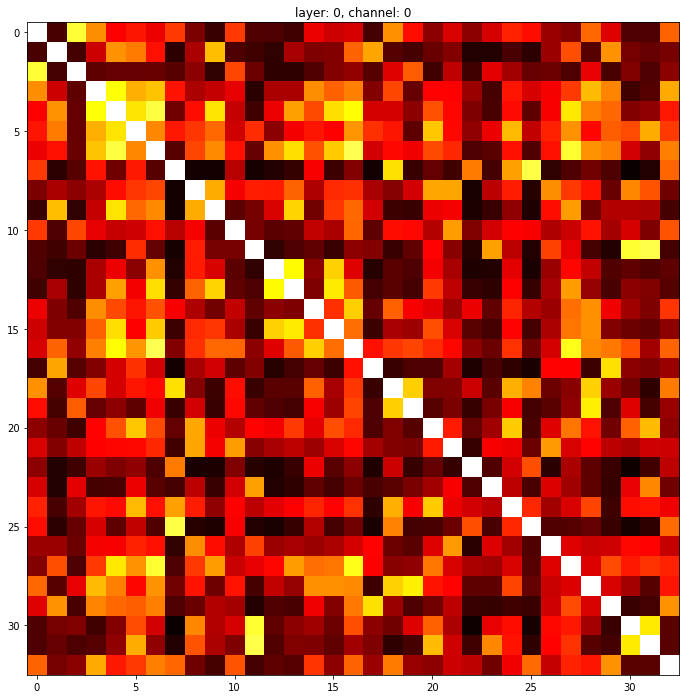

channel:  1
[]
[17682 14233 10362 13437 13064 19589 21041 15828 13876 12174 17828 16627
 15348 17934 15528 17941 16987 14476 16045]
300000
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
number of valid center:  19


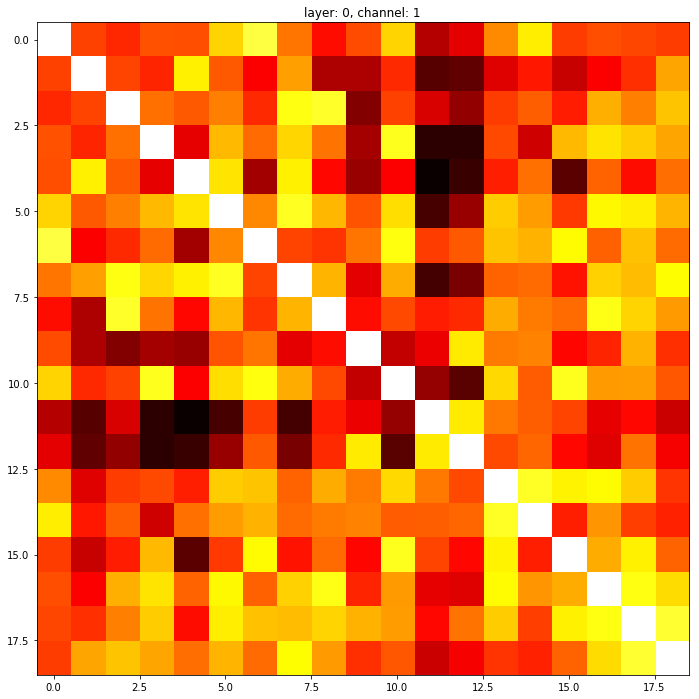

channel:  2
[]
[ 8522 14014 12513 13845 13296 12302 14883 13163 11252 11873  7508 10655
 10424 12523 13800 10960 11823 13566 12086  9003 12735 12570 11283 14171
 11230]
300000
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
number of valid center:  25


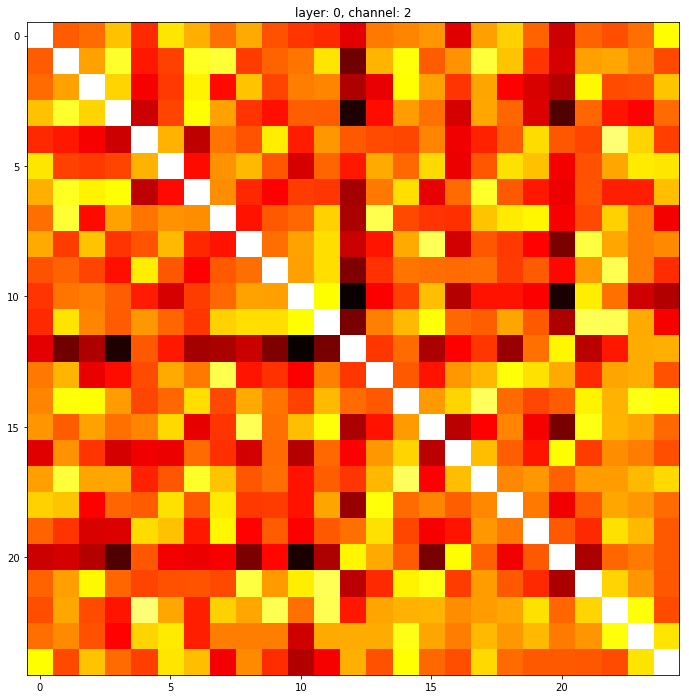

channel:  3
[]
[25157 25613 29895 28305 27015 31703 45670 36004 27911 22727]
300000
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
number of valid center:  10
channel:  4
[]
[11279 10648 11115  7958 10416  8072 11041 11858 10940 10554 13690 12767
 12096 12140 11332 11540 15545 10888 13695 15248 14015 15493  8904 12457
 16309]
300000
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

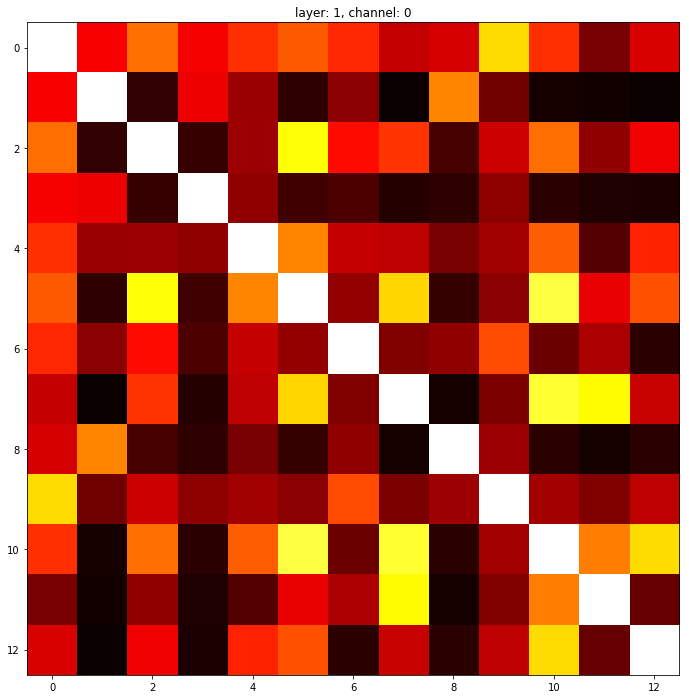

channel:  1
[[0]]
[205838   7348   4515   9506   7761   6259  11931   3926   5360   9994
   2621   4260   6076   9134   5471]
300000
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
number of valid center:  15


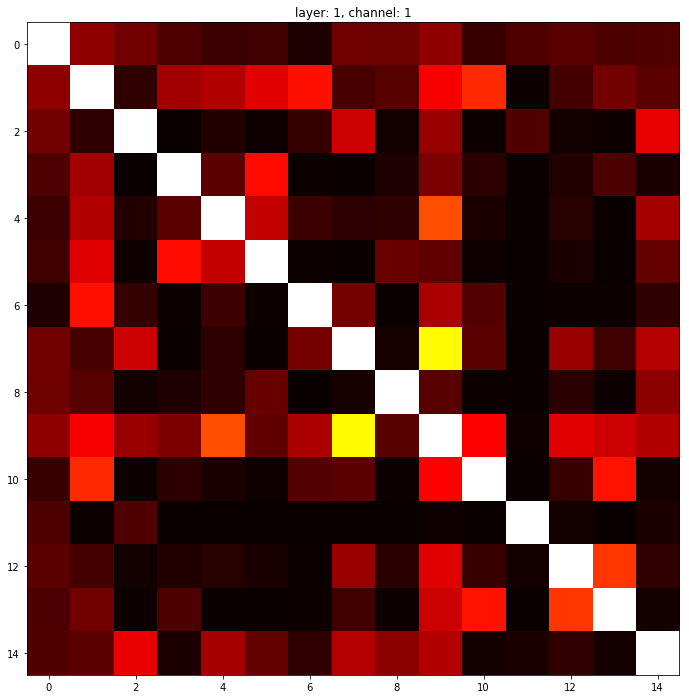

channel:  2
[]
[37352 10812 28603 47713 56330 16184 72147 30859]
300000
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]
number of valid center:  8


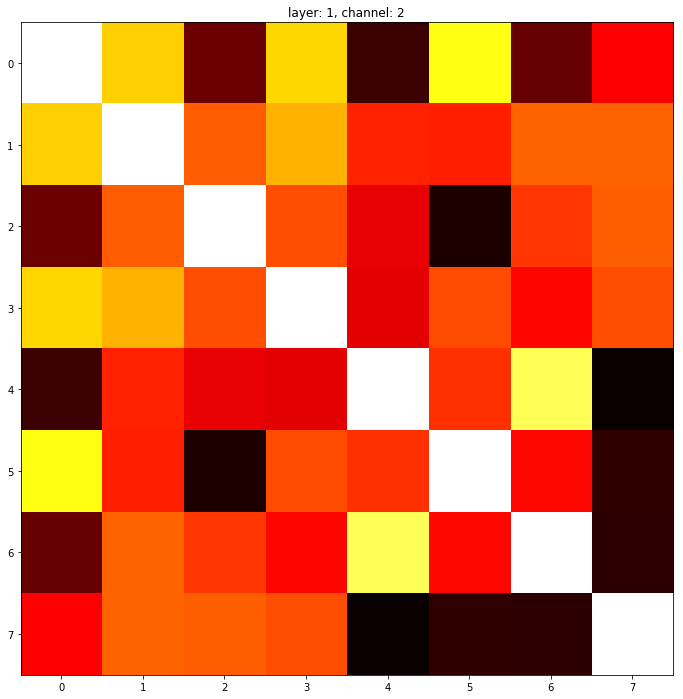

channel:  3
[[0]]
[224247   8551  19577  11316   8304     11   7668  20326]
300000
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]
number of valid center:  8
channel:  4
[[0]]
[  269 19282 13369 12082 12677 14682 14755 19398 23228 11613 12145 11882
 13479 13501 18761  7889 11491  9278 18031  2197  6855 12388 20748]
300000
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

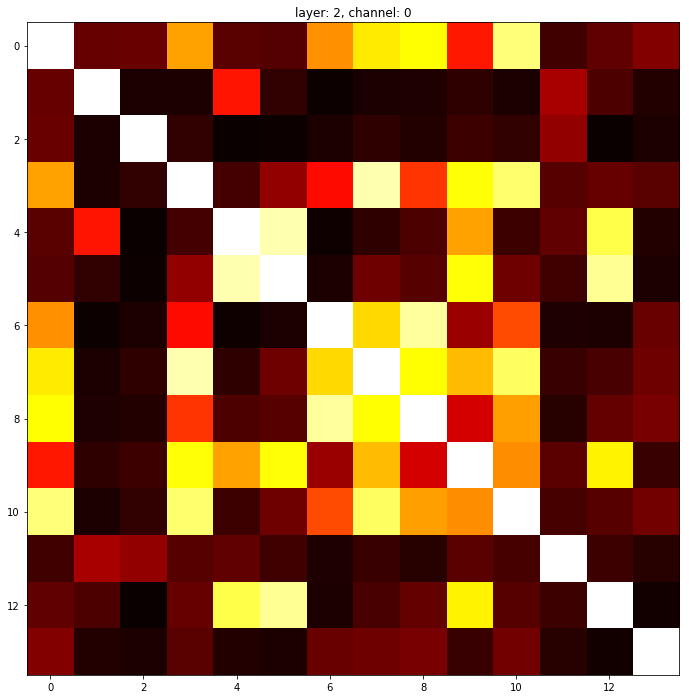

channel:  1
[[0]]
[133840  59009  43711  26431  16121  20888]
300000
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
number of valid center:  6


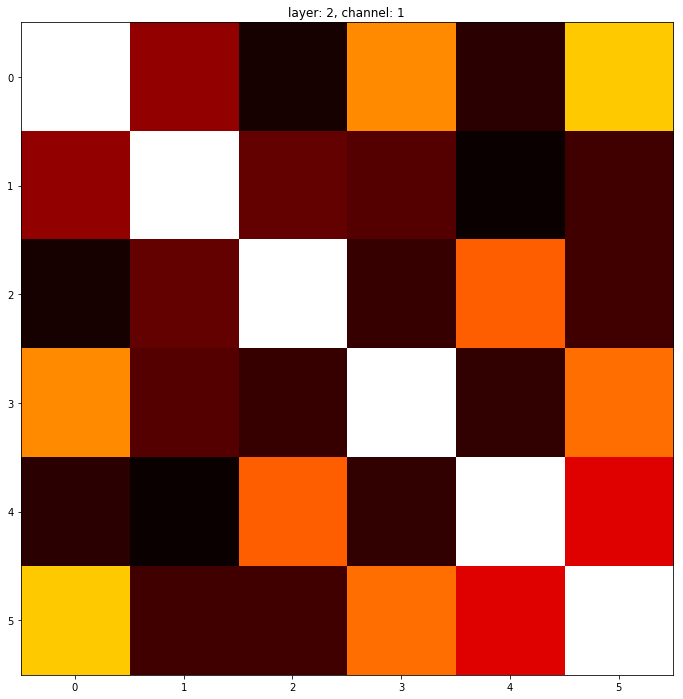

channel:  2
[]
[300000]
300000
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
number of valid center:  1


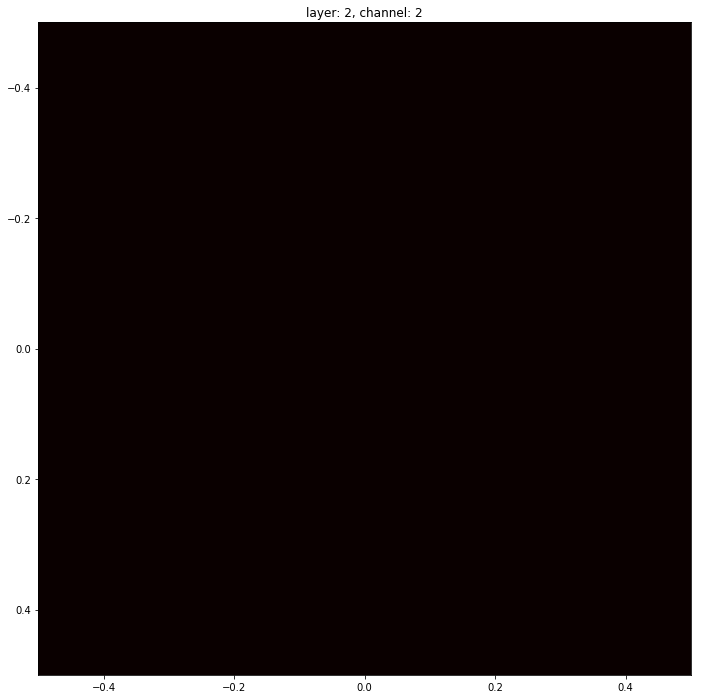

channel:  3
[[0]]
[19464  2875 27477 33748 17066 33335 37948 15604 34137 30824 19829 27693]
300000
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
number of valid center:  12
channel:  4
[[0]]
[215544   7316   2627   5133   2368   5708   2446   4390   7461     36
   3469   4262   2949   5815   3095   4479   2744  14871   3383   1904]
300000
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0

In [291]:
valid_center_idx = []
for k, v in center.items():
    total_valid_center = 0
    print 'layer:', k, 'center size: ', v.shape
    table_layer = table[k] # (nb_channel, 200)
    for i in range(v.shape[0]):
        print 'channel: ', i
        tmp = v[i]
        tmp_table = table_layer[i]
#         print tmp.shape
    #         vis_simi(tmp)
        cos_dis = tmp.dot(tmp.T)
#         print cos_dis.shape
        diag = cos_dis[range(200), range(200)]
        indices = np.argwhere(0.999<diag).reshape(-1)
        useless_indices = np.argwhere(0.999>diag).reshape(-1)
        print np.argwhere(indices.reshape(-1)==0)
        print tmp_table[indices].reshape(-1)
        valid_center_idx.append(indices)
        print tmp_table[indices].sum()
        print tmp_table[useless_indices].reshape(-1)
        new_cos_dis = cos_dis[indices.reshape(1,-1), indices.reshape(-1,1)]
        total_valid_center += len(indices)
        print 'number of valid center: ', len(indices)
        if i < 3:
#             print 'number of valid center: ', len(indices)
#             print new_cos_dis[2]
            vis_simi(new_cos_dis, plot_name='layer: '+str(k)+', channel: '+str(i))
#         break
    print 'total valid center for layer: {}, is {}/{}'.format(k, total_valid_center, v.shape[0]*v.shape[1])
print len(valid_center_idx)

In [277]:
def vis_simi(mat, plot_name, fig_size=(12,12)):
    plt.figure(figsize=fig_size)
    plt.imshow(mat, cmap='hot', interpolation=None)
    plt.title(plot_name)
    plt.show()

# Confusion Matrix

In [279]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, title_name, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(title_name)
    return fig

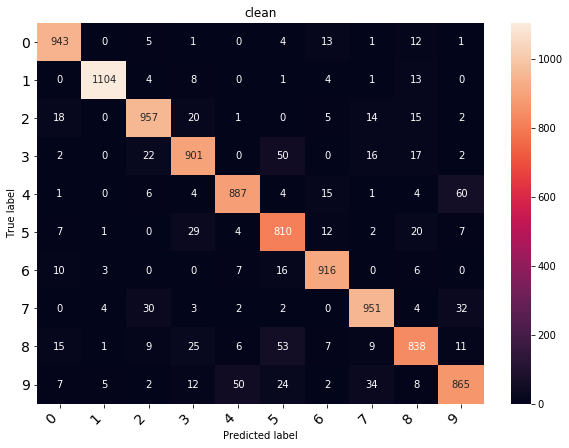

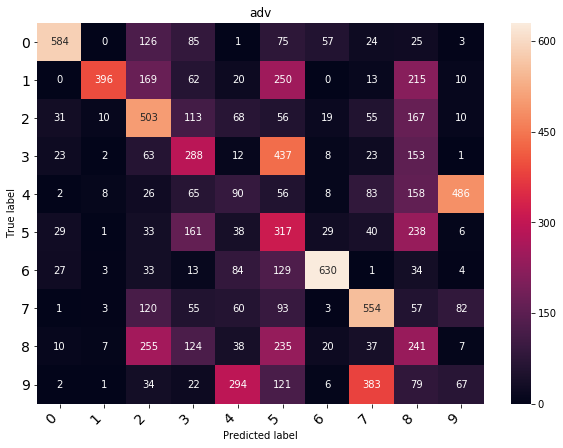

In [286]:
import matplotlib
matplotlib.use('Agg')
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
y_pred_adv = adv_info['pred']
y_pred_nat = clean_info['pred']
labels = [i for i in range(10)]
y_test = clean_info['gt']
cm_nat = confusion_matrix(y_test, y_pred_nat, labels)
cm_adv = confusion_matrix(y_test, y_pred_adv, labels)
fig = print_confusion_matrix(cm_nat, [str(i) for i in range(10)], 'clean')
plt.show()
fig = print_confusion_matrix(cm_adv, [str(i) for i in range(10)], 'adv')
plt.show()

In [86]:
import pickle

In [115]:
def process_center(clean_info, start=0, end=60, layer=3):
    res = [np.concatenate([clean_info['center'][i+j] for j in range(layer)], axis=1) 
           for i in range(start, end, layer)]
    res = np.concatenate(res, axis=0)
    return res

# Clean images

In [280]:
clean_info_path = './pytorch-adversarial_box/clean_info.pkl'
with open(clean_info_path, 'r') as f:
    clean_info = pickle.load(f)
clean_info.keys()

[u'imgs', u'pred', u'gt', u'center']

In [281]:
print clean_info['imgs'].shape
print clean_info['pred'].shape
print clean_info['gt'].shape
print len(clean_info['center']) # 20 batch * 3 layer

print clean_info['center'][0].shape
print clean_info['center'][1].shape
print clean_info['center'][2].shape
print clean_info['center'][3].shape
print clean_info['center'][4].shape
print clean_info['center'][5].shape

(10000, 1, 28, 28)
(10000,)
(10000,)
60
(500, 32)
(500, 32)
(500, 64)
(500, 32)
(500, 32)
(500, 64)


In [282]:
clean_info['center'] = process_center(clean_info)
clean_info['center'].shape

(10000, 128)

In [287]:
def show_one_img(idx = 0, info=clean_info):
    try:
        plt.imshow(info['imgs'][idx][0], cmap='gray')
    except:
        plt.imshow(info['adv_imgs'][idx][0], cmap='gray')
    plt.title('gt: {}, pred: {}'.format(info['gt'][idx], info['pred'][idx]))
    plt.axis('off')
    plt.show()
    print info['center'][idx]
    not_in_valid_center = []
    for i in range(len(info['center'][idx])):
        if info['center'][idx][i] not in valid_center_idx[i]:
            not_in_valid_center.append(info['center'][idx][i])
#             print i, len(valid_center_idx[i]), valid_center_idx[i]
    print 'number of center not in valid center: ', len(not_in_valid_center)
    print not_in_valid_center

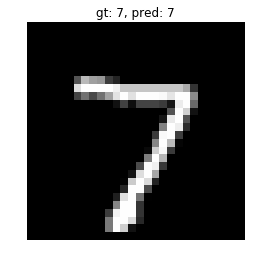

[152  66  62 170 136  86  68  14 122  47   2  73 156 152   2 142  54   0
  67  59  26 100  81  10 123 136  68   0  49  36 164  20 176   0 145   0
  38 167  47  47   0   0 190  36  97   0   0  51   0  60 182 118  12   0
   0   0   0 100  34   7 162  40   0   0  91  15  51   4 117 175   0  98
 159  87  57 157 158   1 194 157 120 159 198 147 136  23 177 136 158  40
  73  97  98  53 176 146 190   0  74   0 161  46  25 157  15  65 123 188
   6  42  67 168  46   0 109  40  74 163   6   9 119 101 125   0 152 127
 159 191]
number of center not in valid center:  1
[0]


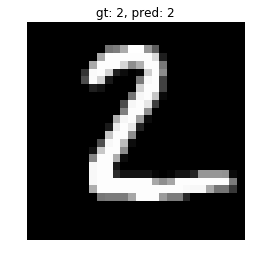

[175  91  57 168 135  13  43 163 142  84 101 194 101  46 113  53 108 195
  15 141  87  47 163  53  79  75 170   0 103   3   8 186 146   0  98   0
 118 172 179 186   0   0  96 115 147 120   0 142   0   0 144   0   0   0
   0   0   0 150  27 115 159 196   0   0 180   0  51  48   0   0  20   0
  45  87  31  94 122   1 121 115 175   0   0 196 124  41 128  53  56  40
  63 180  98 109 153  37  89   0  74  62 161  10  23   0  55  23  13 179
  26  52   0  37  73  87   8   0   2  93 133   0 161  51  34   0  87  66
 159   0]
number of center not in valid center:  1
[0]


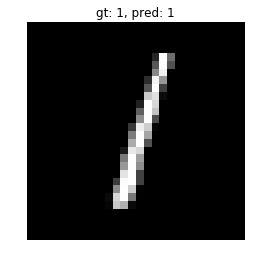

[  0 110 155 168  78 108   0  24 102 117  54   0 191  29  54 172  42  79
 131  39 131  65 163  59 141  88  79   0 197  38 142 177  17   0 105   0
  17 168   0   0   0   0 112 153  80  46   0 107   0 147  90  81 192   0
   0  22   0  31 190  56   6  72  50   0 171  11  51  16   0  28   0   1
 131  87 199  96 160  56  85 158 133 195 178 102  50 184 128   0  35  30
 153 180  98 151 145   0 149   0  74   0 161  10  23  16  55 139 114  80
 133 166   0  54 122   0 189   0  54  40 143  44 168 112  68   0   0 175
 159   1]
number of center not in valid center:  2
[0, 0]


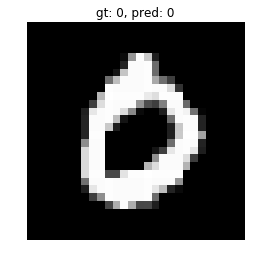

[148  89  59 195 134 166  76   7 185  31 113   0   9 103   6  90 140 127
  87  70 113  47  24  24 100  12   0   0   0  14 136  16  75   0  98   0
 192  37 179 186   0   0  17  89 170  79   0 110   0  34   0  30  94   0
   0   0   0 100  46 117   2 124   0   0   0 141  51 180   0   0  20 147
  89  79 154  42  98   1   2 109  76 179  76   0  25 175   0  69   0   0
 181  97  98  26 156   6 110   0  74   8 161   0 141 190  94  77 162  18
   0 184   0 152 121   0  50 165  56   4 194   9 104 157 125   0  59 110
 171  47]
number of center not in valid center:  3
[0, 0, 0]


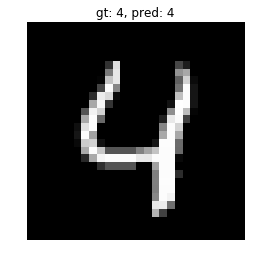

[ 25  37  61 132 196 150 163 118  97 191  26  56 194 135  31 152  12 121
  75  50  91  10 119  38   8  27 160   0 173  12 124  39 162   0 105   0
 102  62 144  69   0   0 186 186   9  13   0   7   0   3  71  94  48   0
   0   0   0  86 173  53 183  46   0   0 101 104  51 144  11  57 134  81
  10  79 175  47  78   1 104 176  85 129  48 132 198  62  13   1  40  28
  73  97  98 193   0 171  49   0  74   0 161 127 187 124  15 129 189 148
   6  64  78  80 104   0  45  40  65 195  48  86  97   0 114   0  96 181
 159 161]
number of center not in valid center:  1
[0]


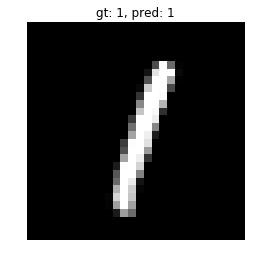

[  0 110 155 168  12 108  34  24 102 117  54 177 191  29  54 172  42  79
  22  39 131  65 163  59 141  76   0   0 142  38 142 177  17   0 105   0
  17 168   0   0   0   0 112 115 107  46   0 107   0  64  90  81  81   0
   6  22   0  31 190  56   6  46   0   0   0  11  51  16   0  28   0 147
 131  87 199  96 114  56  85 158 133 195 178 102  50 184 128   0  35  30
 153 180  98 151 145 133 149   0  74   0 161  10  23  16  55  23 158  80
 133 105   0  54 122   0 189   0  96  40 147  44   0   0  68   0   0 171
 159  29]
number of center not in valid center:  2
[0, 0]


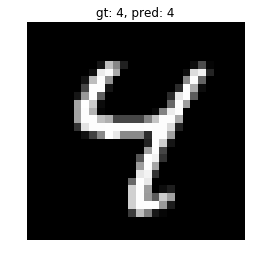

[102 103  61 164 136 169  84  59  10  78   5 177  98  14 196 152   4 121
  25  50  91  10   7  74   8  80  79   0  49  96  76  64 111   0 145   0
   2   0  47  69   0   0 190  64 108   0   0  77   0   3  50  94  48   0
   0   0   0  92 144 130  38  73   0   0 142 104  51 144 180  57 134  81
  10 138   0  26  48   1  59  29  85 129  47 164  18 157  13   1  40 165
  73  97  98 193   0  98  49   0  74   0 161 127 187 124  15 129 189 148
   6  64  78 168 104   0 121  40 175 195 136  86 168   0 114   0  96 181
 159  97]
number of center not in valid center:  1
[0]


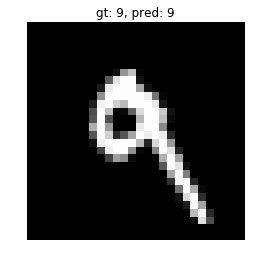

[125 173 160 164 178  88  76 118  25  33  19 162  47  46  96 181  12 149
  75 197  91  14  80  36  93 192  79   0   0  64  20 117 155   0 105   0
  66   0  47 141   0   0 100  89  61  13   0   7   0  24 111  94  48   0
   0   0   0  92 122  53 144  73   0   0 142 104  51 169   0 134 134  61
   0 138 175  12  48   1 104 143  85 104 112 132 171 116  41   1   0  88
  73  97  98  87   0   6   0   0  74   0 161 127  91  10  15 183  34  70
   6   0 170   0  81   0  58  40 150 193   6  61  94  46 125   0  96 181
 159   0]
number of center not in valid center:  1
[0]


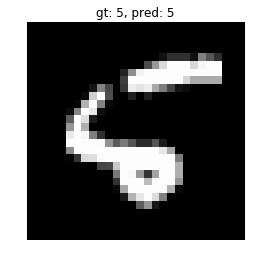

[  0 173   5 164 196 101  60 118 194  57   5 126  98 104  31 152 196 121
  96  70 113  59 119 131   8 169 160   0 150  96 115 117 146   0 105   0
  78  62 144 141   0   0  19 186   9  13   0   7   0 172  50  94  48   0
   0   0   0  86 173  53  38  12   0   0   0 104  51 169 180 134 134  61
  47 138 154 115 133   1 104 176  76 104 112  29  18   0  13  61 140  28
 181  97  98  81  86 146 145   0  74   0 161 196  91 122  15 129  34 148
   6 181 170   0  81   0  58  40   0 182  48 184 196  46 114   0 152 139
 159 161]
number of center not in valid center:  1
[0]


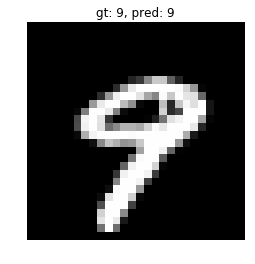

[125   4  45  11 100 141  51 187 174  27   2  10 159 167  97  61   4   0
  76 192  26 152 133 138 175  33 193   0  21  57 126 106 155   0 105   0
 106   0  47  47   0  62 159  64  61   0   0  77   0  60 111 118  12   0
   0   0   0  92  34 130 162 122   0   0 142  15  51 169   0 127 134  61
   0 138   0  26  48   1  15 163 120 104   1 164  82 116  13   1  40 165
  73  97  98 122   0 112   0   0  74   0 161 127 187 157  15 112  34 148
   6 126  20   0  81   0 122  40 137 193   6  86 119  46 125   0  96  65
 159  47]
number of center not in valid center:  1
[0]


In [331]:
for i in range(10):
    show_one_img(idx=i, info=clean_info)

## Compare path for one particular clean and adv sample.

In [332]:
print 'clean and clean'
idx_1, idx_2 = 7, 9
assert clean_info['pred'][idx_1] == clean_info['pred'][idx_2]
print 'Class: ', clean_info['gt'][idx_1]
print np.sum(clean_info['center'][idx_1] == clean_info['center'][idx_2])

print 'adv and adv'
idx_1, idx_2 = 0, 9
print 'Class 1: {}, Class 2: {}'.format(adv_info['gt'][idx_1], adv_info['gt'][idx_2])
assert adv_info['pred'][idx_1] == adv_info['pred'][idx_2]
print 'clean and adv'
print np.sum(adv_info['center'][401] == clean_info['center'][1])

clean and clean
Class:  9
57
adv and adv
Class 1: 7, Class 2: 9
clean and adv
30


## Common centers for specific class

In [349]:
def find_common_center(clean_info=clean_info, key='gt', vis=True, percentage=0.9):
    mp = np.zeros((10, 128)) - 1
    for label in range(10):
        target_class_center = clean_info['center'][clean_info[key]==label]
        if vis is True:
            vis_simi(target_class_center, plot_name=str(label), fig_size=(100, 60))
        print target_class_center.shape
        for c in range(target_class_center.shape[1]):
            tmp_center = target_class_center[:, c]
            bin_count = np.bincount(tmp_center)
            max_show_center = np.argmax(bin_count)
    #         print 'channel: {}, max show center: {}, times: {}/{}'.format(c, 
    #                                                                       max_show_center, 
    #                                                                       bin_count[max_show_center], 
    #                                                                       target_class_center.shape[0])
            if bin_count[max_show_center] > int(target_class_center.shape[0]*percentage):
                mp[label, c] = max_show_center
    return mp

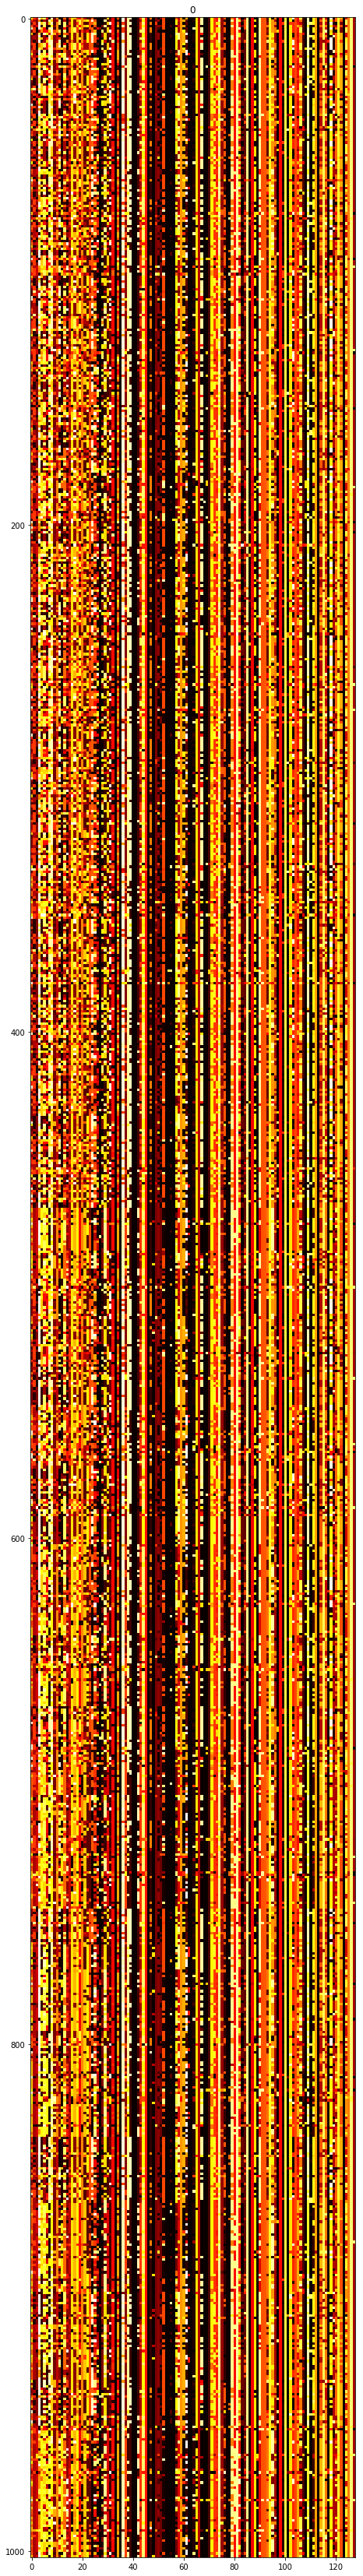

(1003, 128)


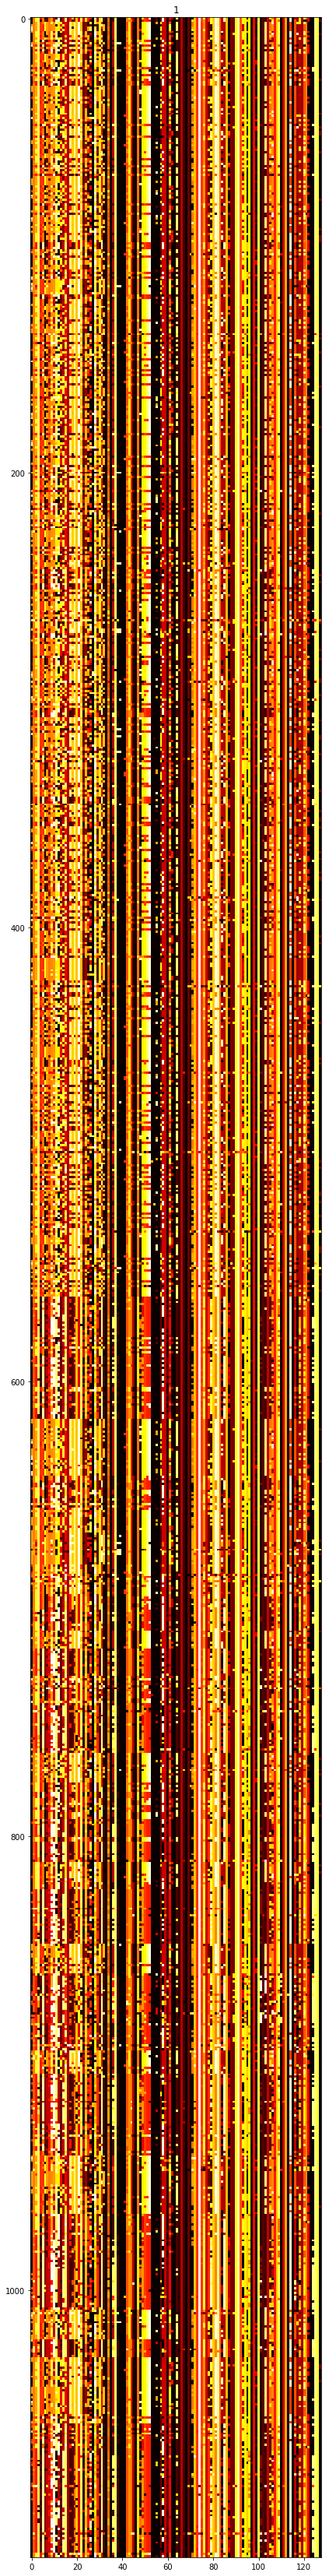

(1118, 128)


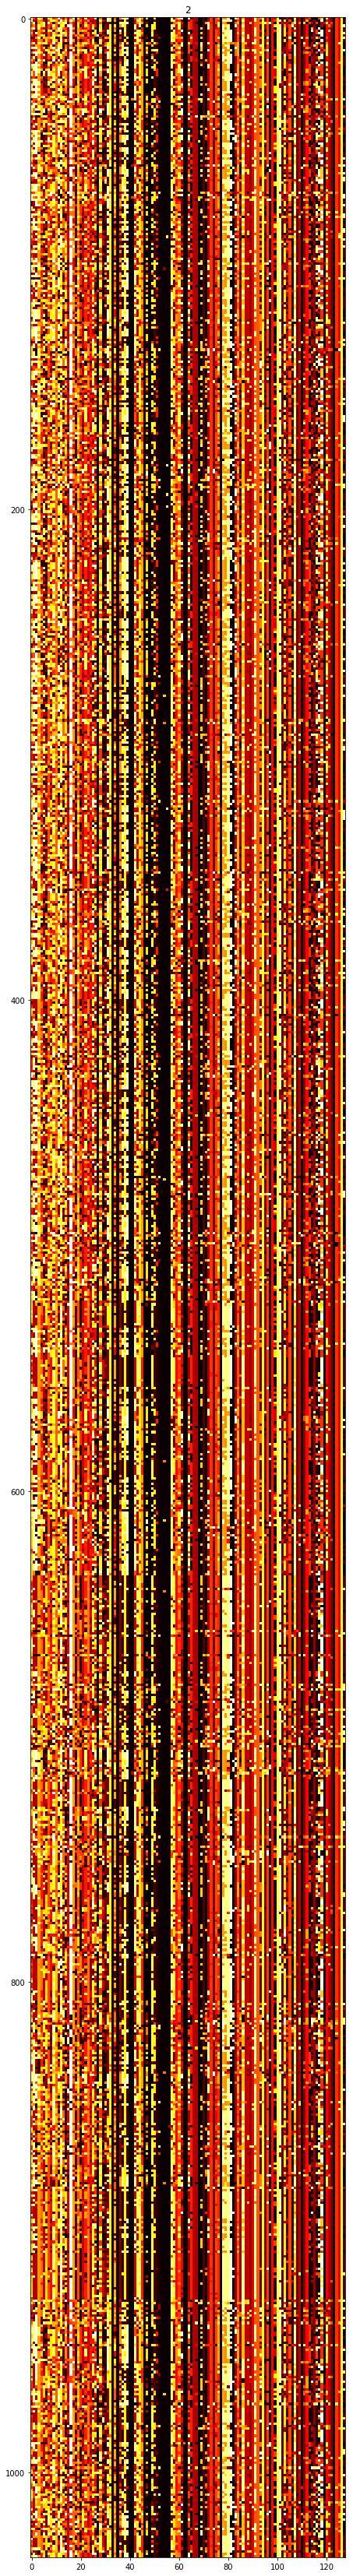

(1035, 128)


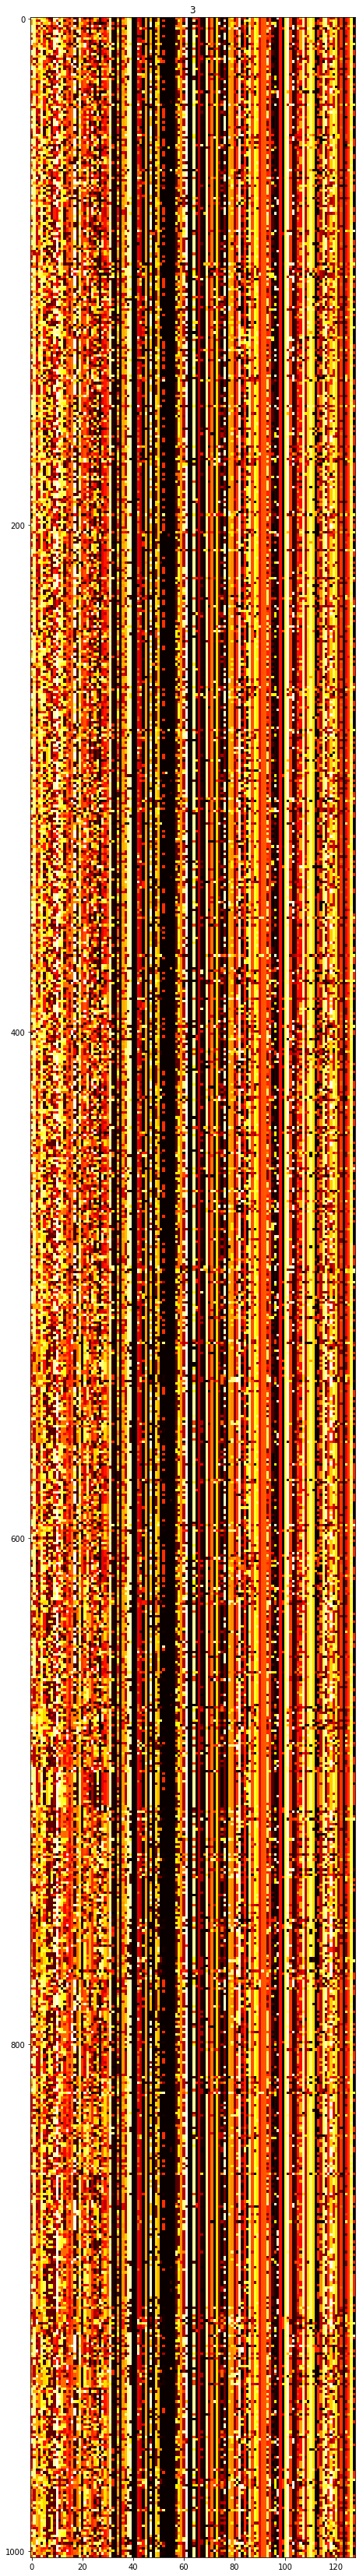

(1003, 128)


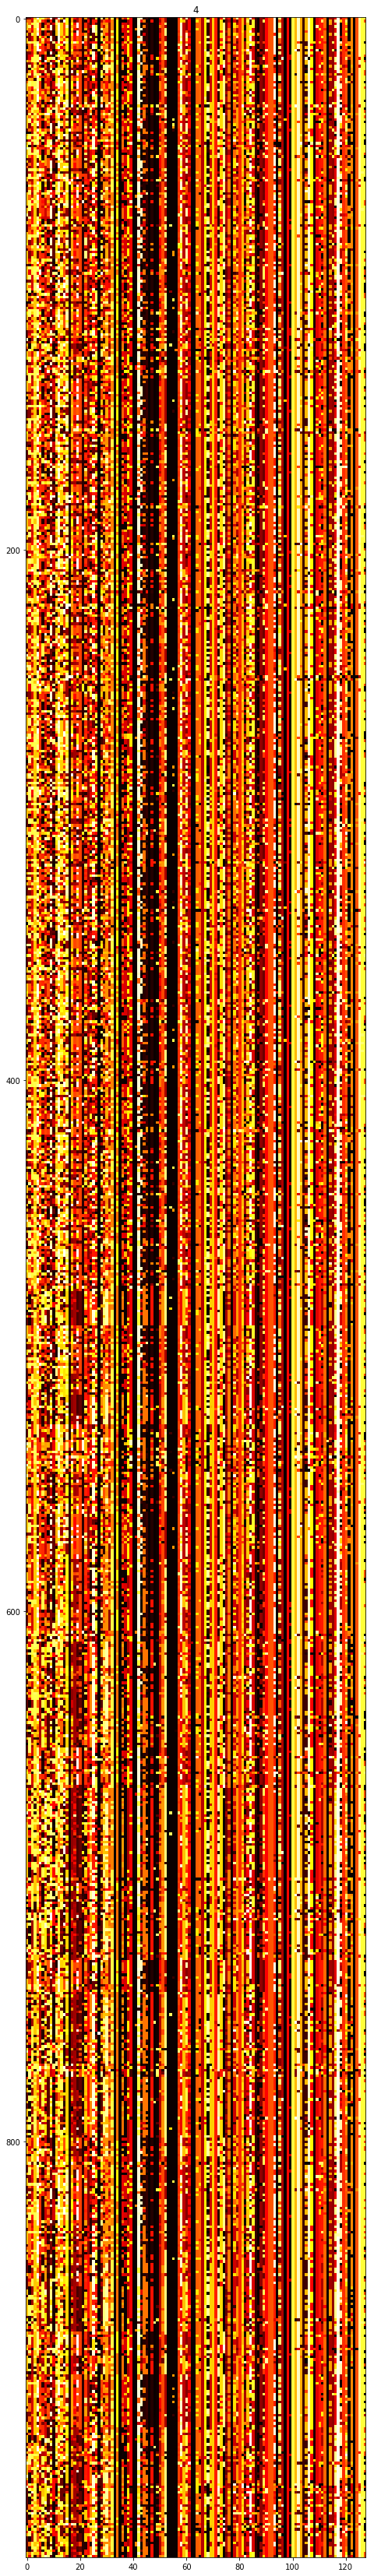

(957, 128)


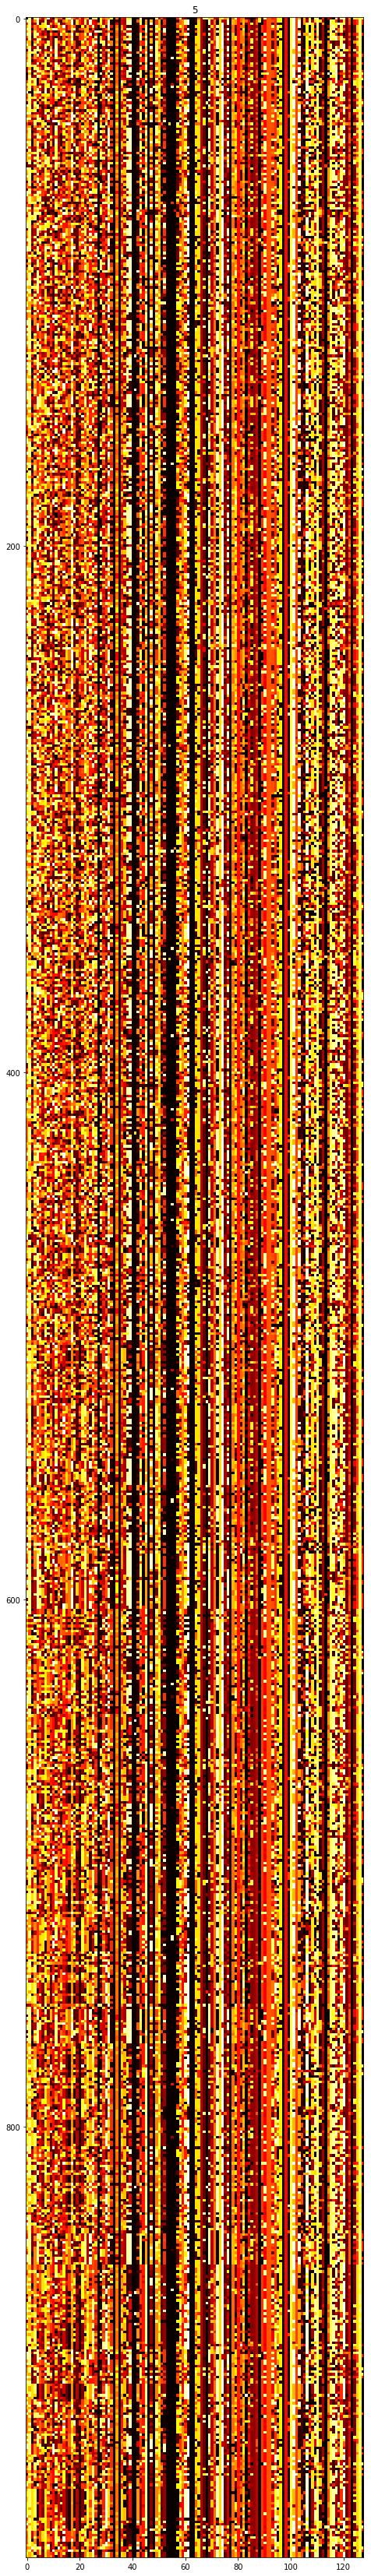

(964, 128)


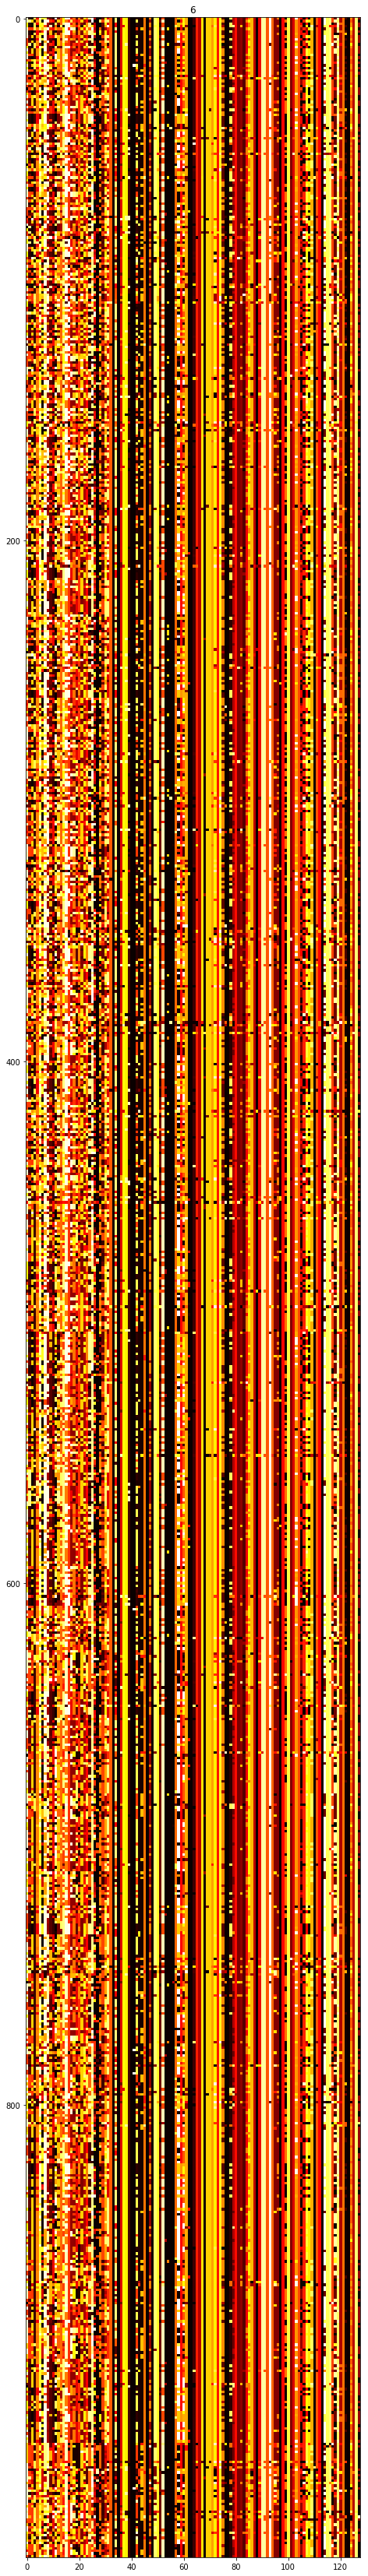

(974, 128)


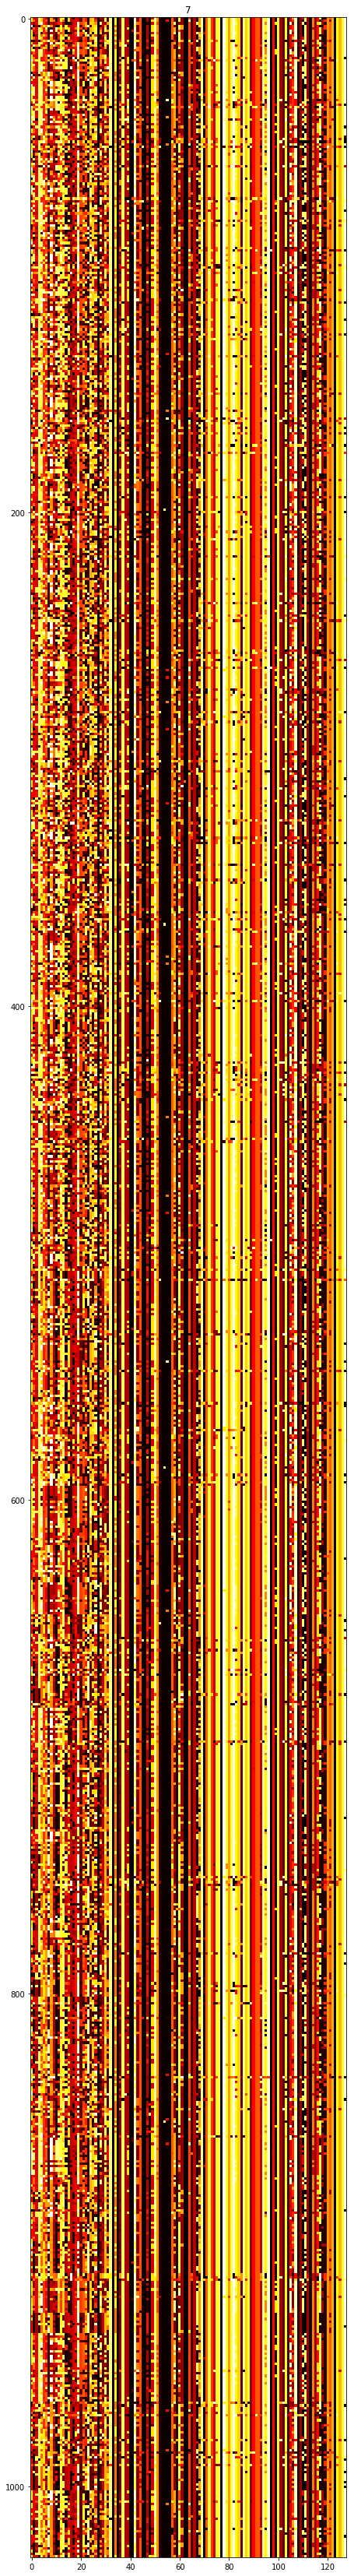

(1029, 128)


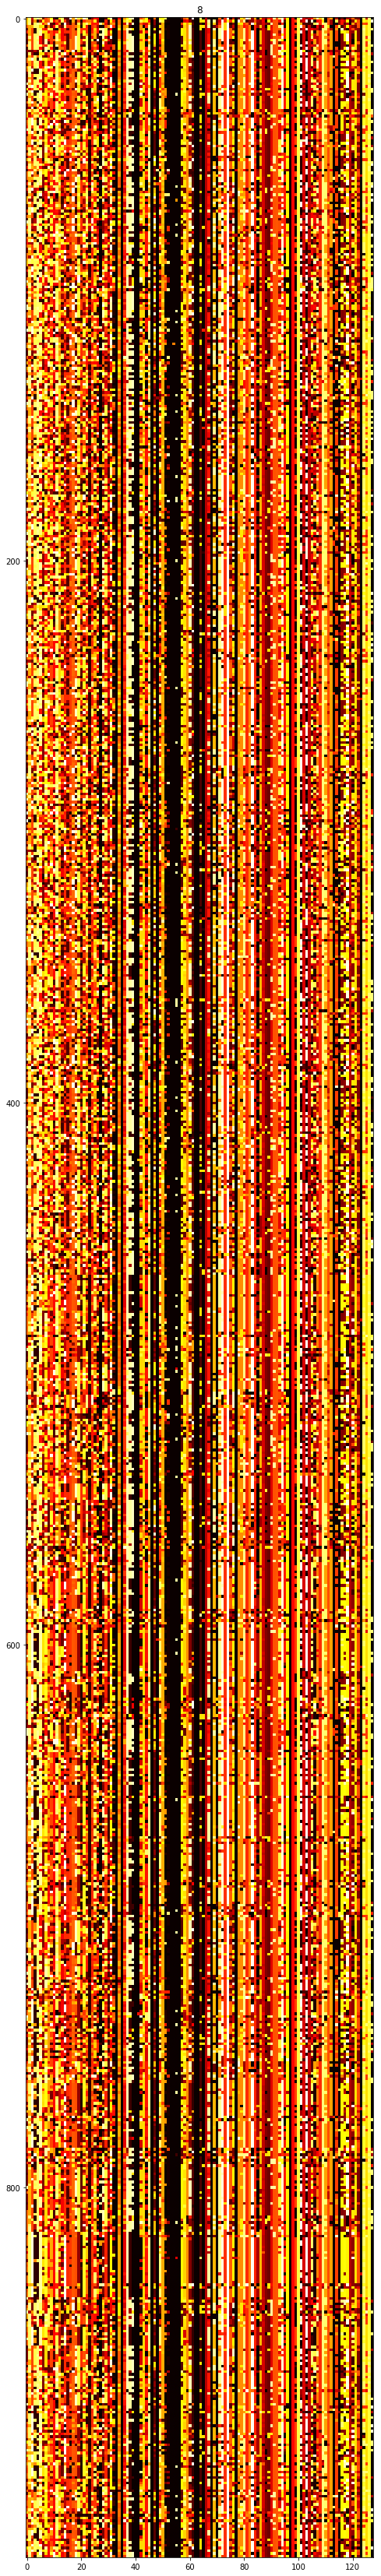

(937, 128)


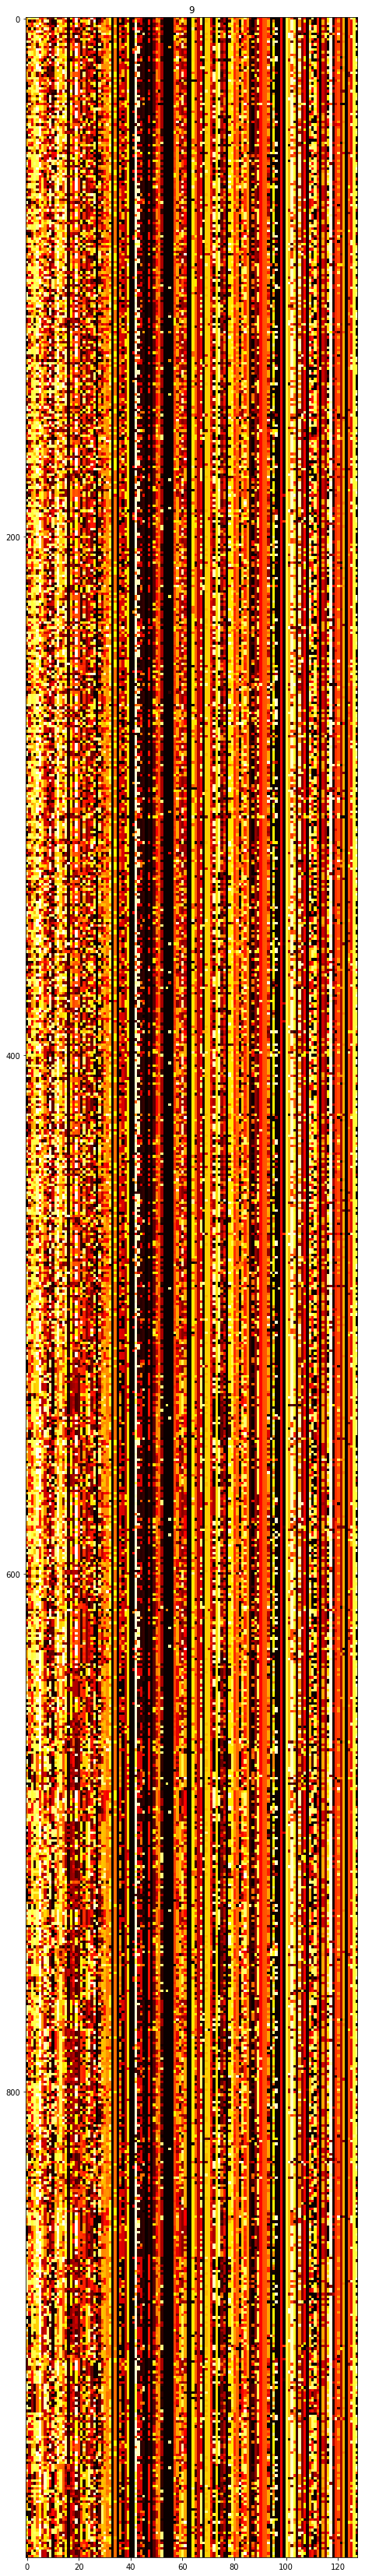

(980, 128)


In [314]:
clean_mp = find_common_center(clean_info=clean_info, key='pred')

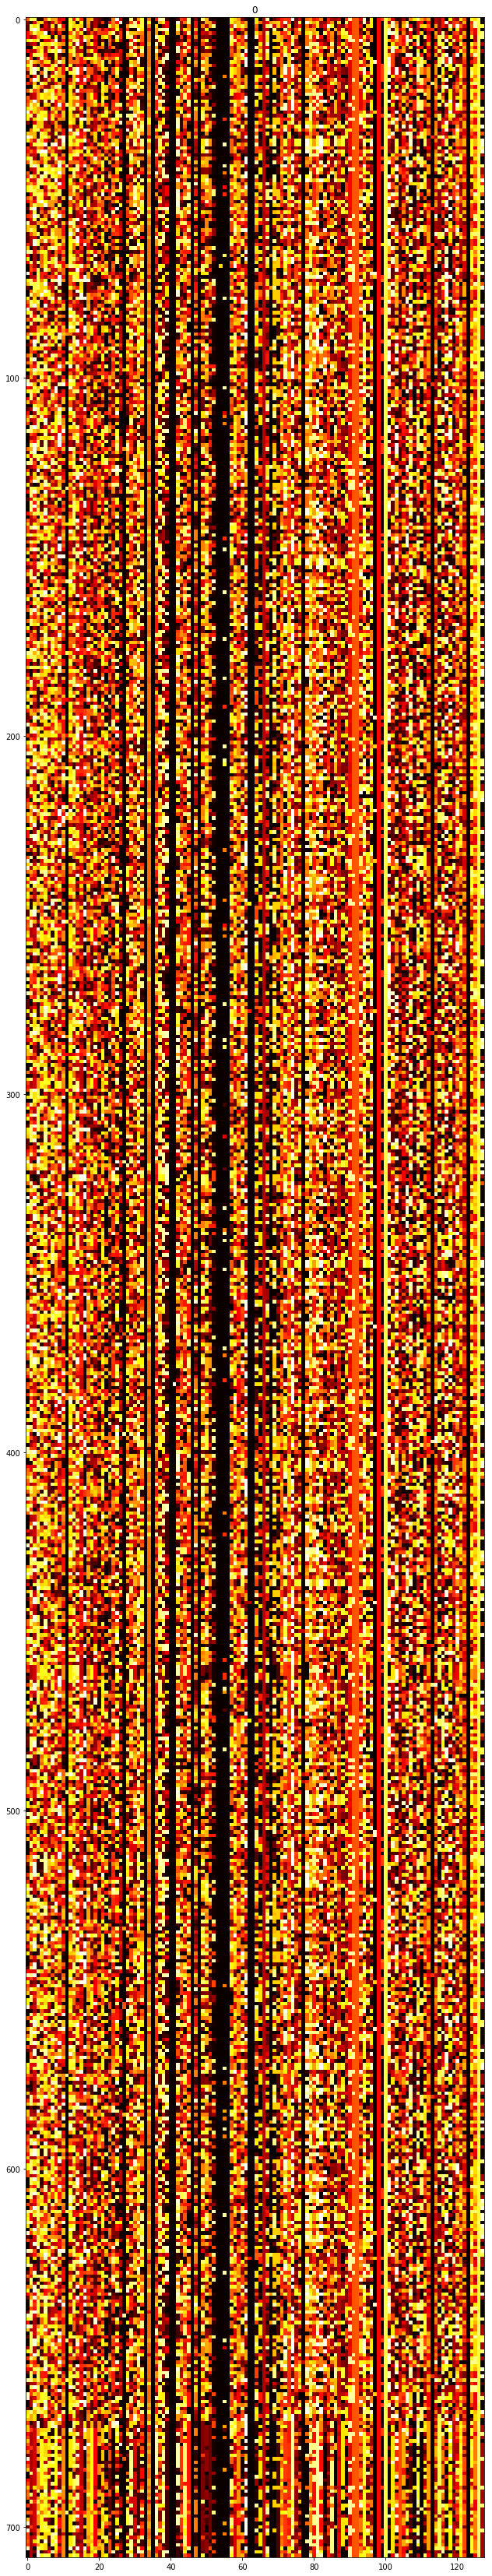

(709, 128)


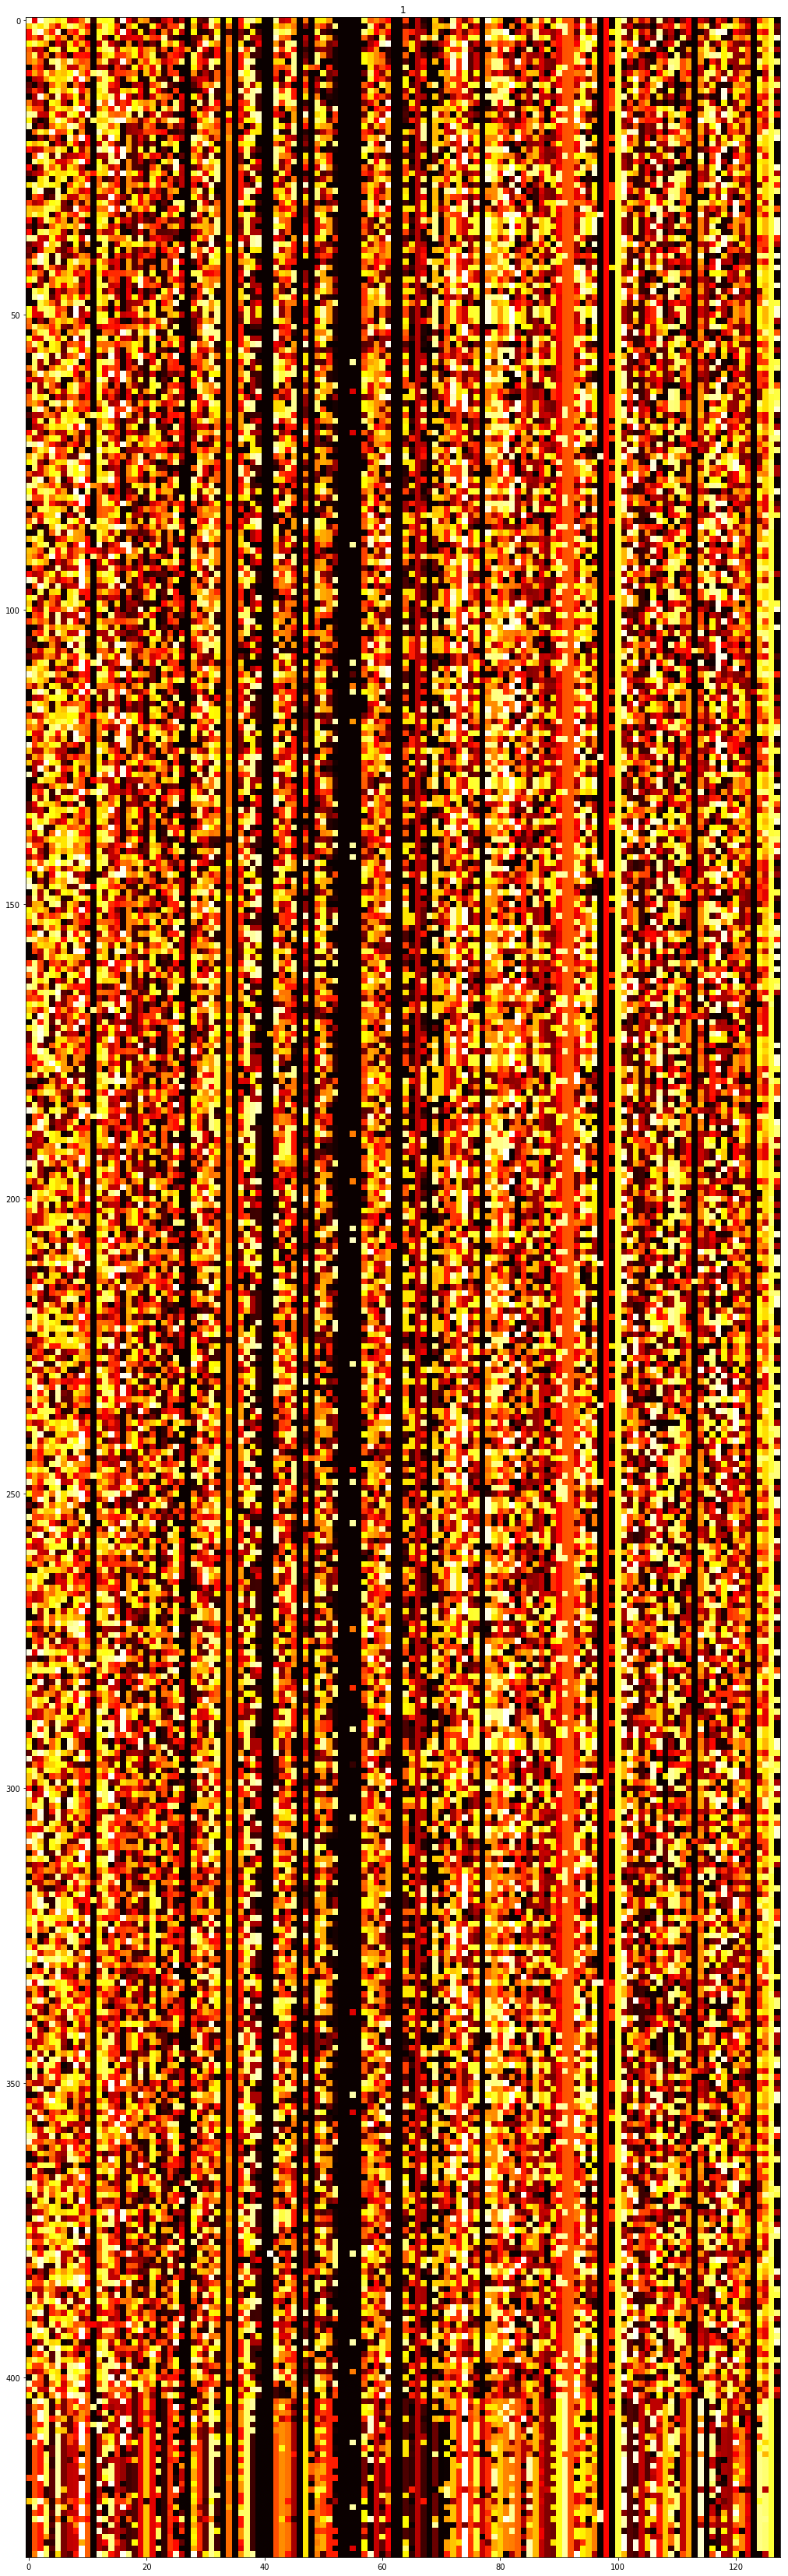

(431, 128)


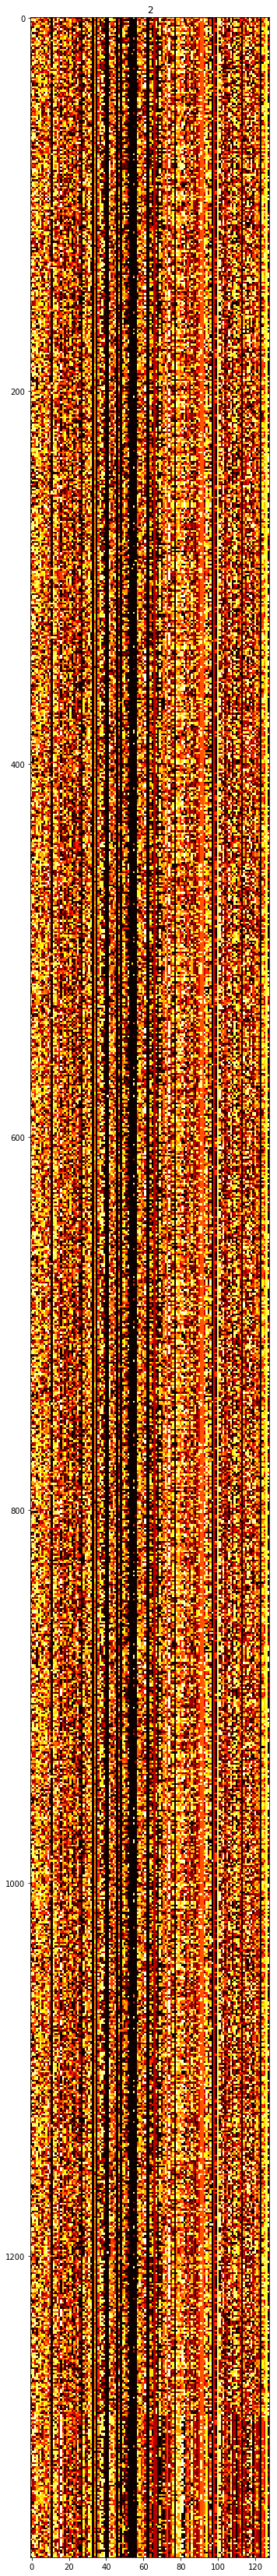

(1362, 128)


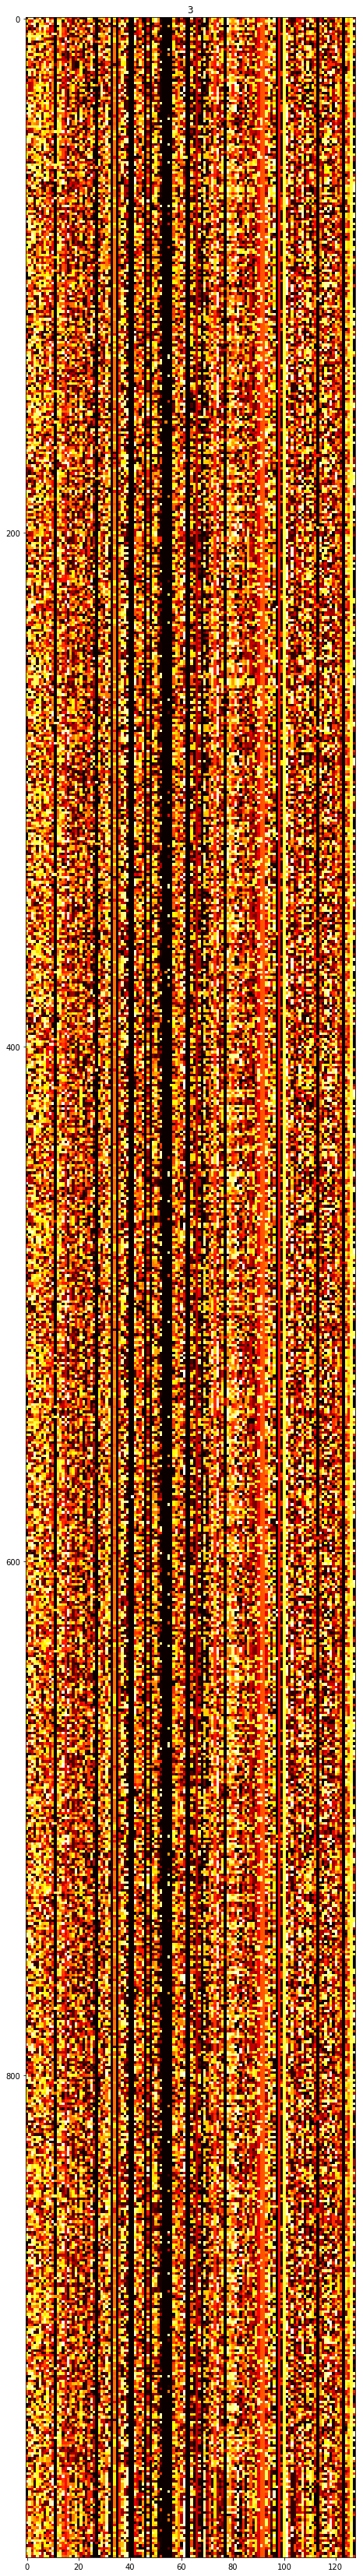

(988, 128)


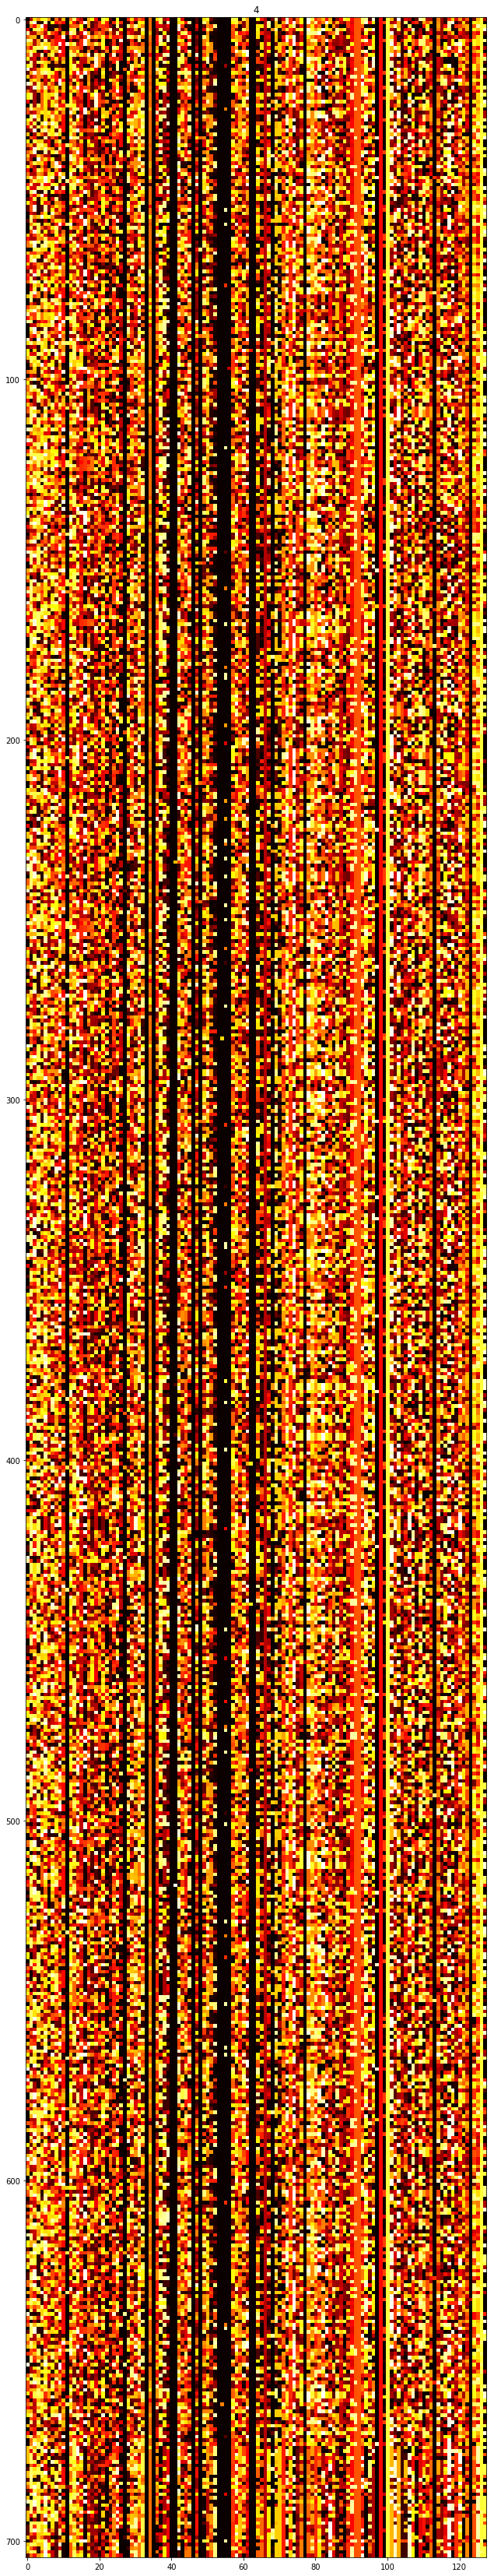

(705, 128)


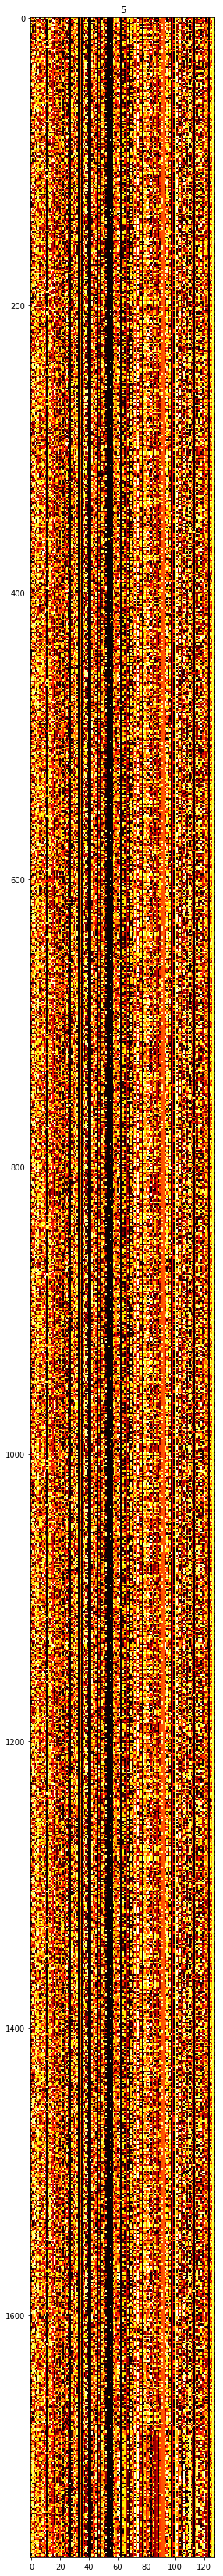

(1769, 128)


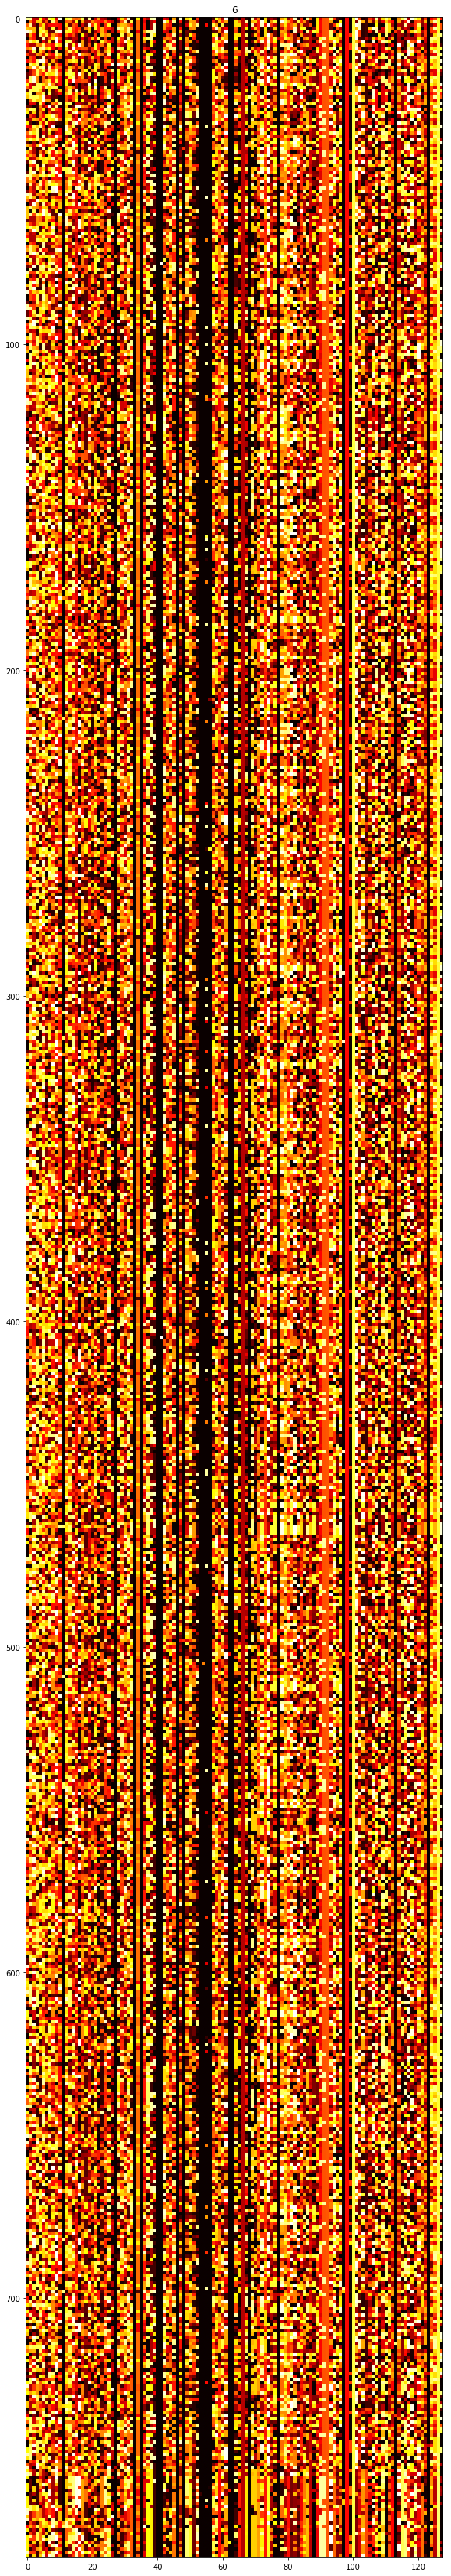

(780, 128)


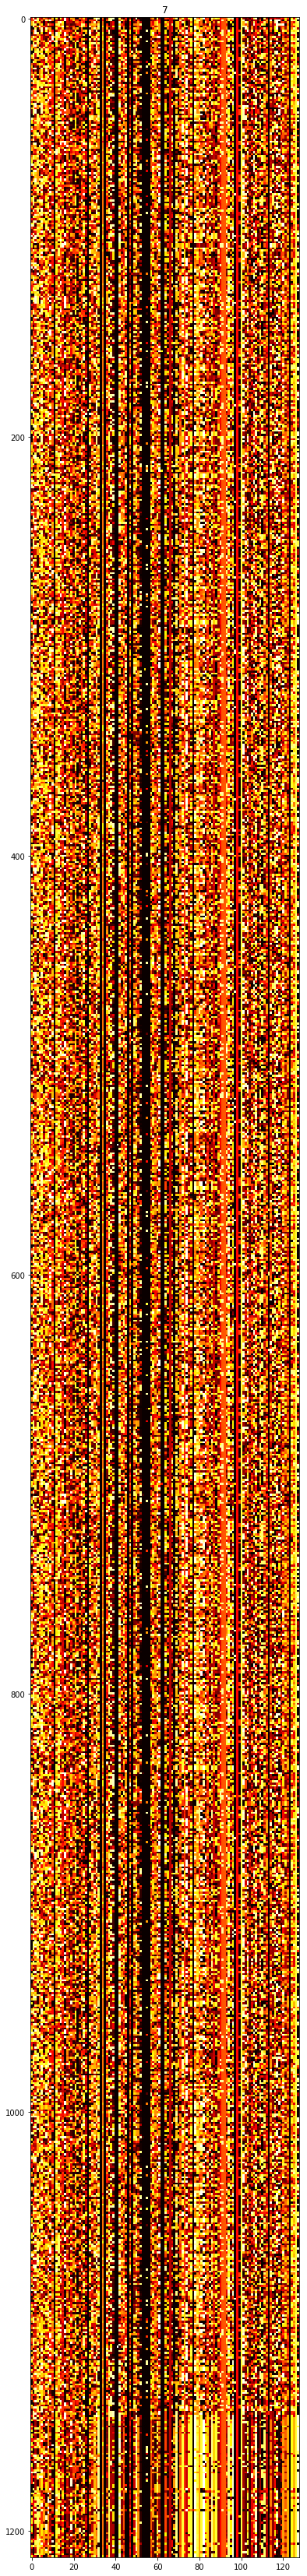

(1213, 128)


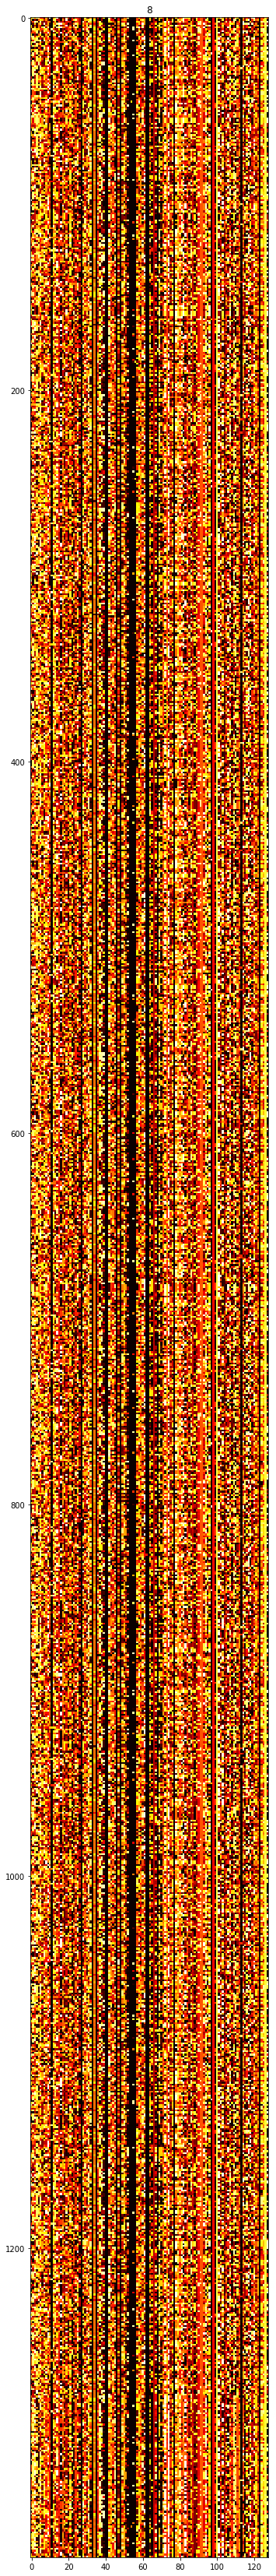

(1367, 128)


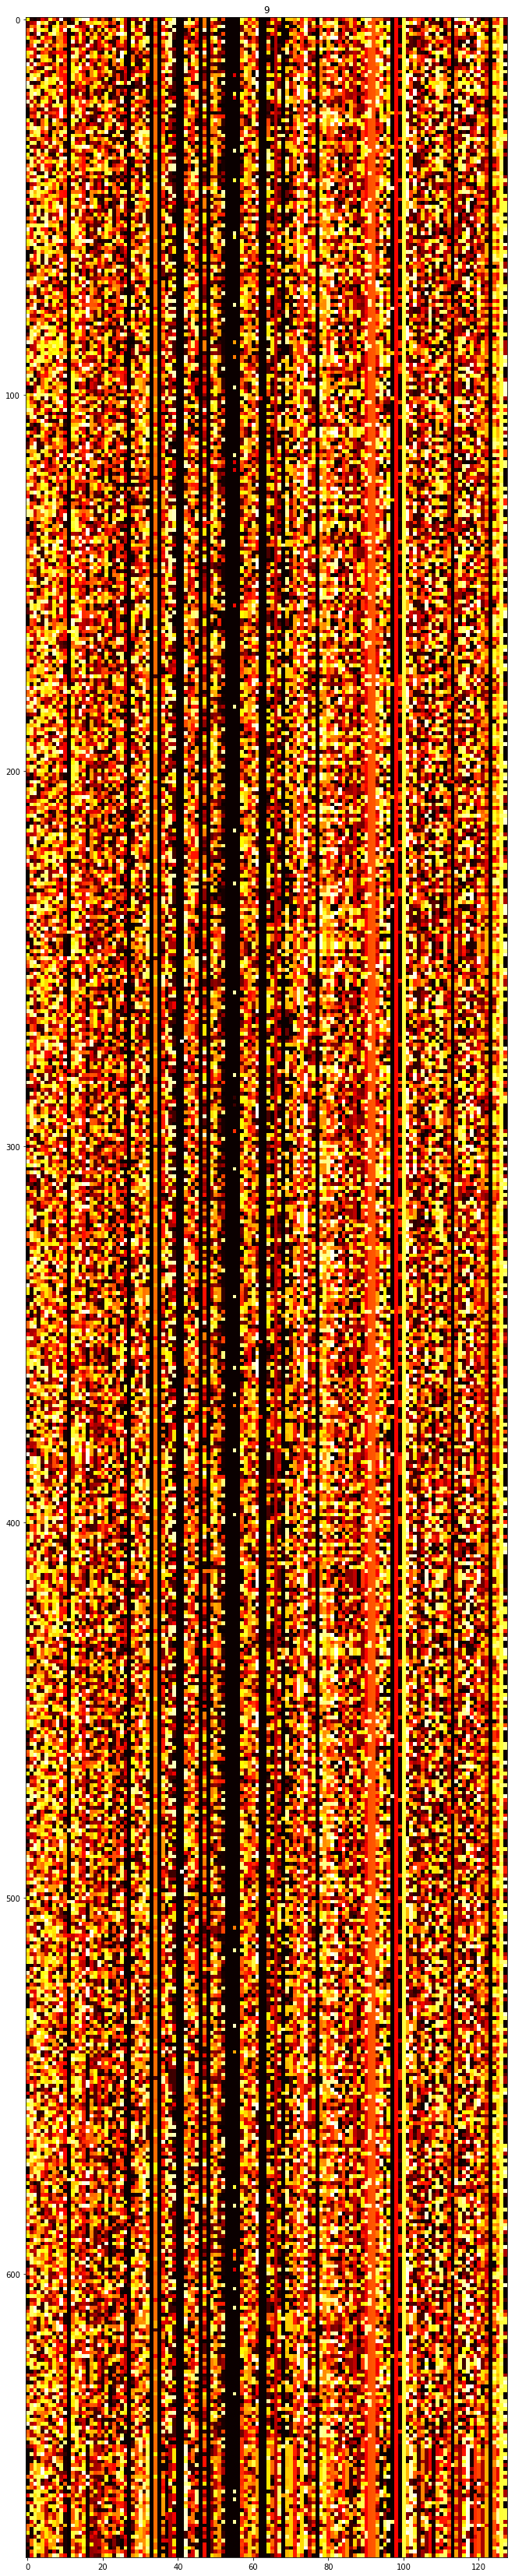

(676, 128)


In [315]:
adv_mp = find_common_center(clean_info=adv_info, key='pred')

In [346]:
for idx in range(10):
    print 'class :', idx
    print_center(idx=idx, mp=clean_mp)
    print '\n'

class : 0
layer 1:
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1.  0. -1. -1. -1. -1.]
layer 2:
[ -1.   0.  -1.   0.  -1.  -1.  -1.  -1.   0.   0.  -1.  -1.  -1.  79.
   0.  -1.   0.  34.  -1.  -1.  -1.   0.   0.  -1.   0.  -1.  -1. 117.
  -1.  -1.   0.   0.]
layer 3
[ -1.  -1.  51.  -1.   0.   0.  20.  -1.  -1.  -1.  -1.  -1.  -1.   1.
  -1.  -1.  -1. 179.  -1.  -1.  -1. 175.   0.  69.  -1.   0.  -1.  97.
  98.  -1. 156.  -1.  -1.   0.  74.  -1. 161.   0. 141.  -1.  94.  -1.
  -1.  -1.   0.  -1.  -1.  -1. 121.   0.  -1. 165.  -1.   4.  -1.  -1.
  -1.  -1.  -1.   0.  -1. 110. 171.  47.]


class : 1
layer 1:
[ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
  -1.  -1.  -1.  -1.  -1.  -1. 131.  -1.  -1.  -1.  -1.  -1.  -1.   0.
  -1.  -1.  -1.  -1.]
layer 2:
[ -1.   0.  -1.   0.  -1. 168.  -1.   0.   0.   0.  -1.  -1.  -1.  -1.
   0.  -1.  -1.  -1.  -1.  -1.  -1.   0.   0.  -1.   0.  -1.  -1.  56.
  -1.  

In [347]:
for idx in range(10):
    print 'class :', idx
    print_center(idx=idx, mp=adv_mp)
    print '\n'

class : 0
layer 1:
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  0. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1.  0. -1. -1. -1. -1.]
layer 2:
[-1.  0. -1.  0. -1. -1. -1. -1.  0.  0. -1. -1. -1. -1.  0. -1.  0. -1.
 -1. -1. -1.  0.  0.  0.  0. -1. -1. -1. -1. -1.  0.  0.]
layer 3
[ -1.  -1.  51.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   1.
  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
  98.  -1.  -1.  -1.  -1.   0.  74.  -1. 161.  -1.  -1.  -1.  -1.  -1.
  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.
  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.]


class : 1
layer 1:
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  0. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1.  0. -1. -1. -1. -1.]
layer 2:
[-1.  0. -1.  0. -1. -1. -1. -1.  0.  0. -1. -1. -1. -1.  0. -1.  0. -1.
 -1. -1. -1.  0.  0.  0.  0. -1. -1. -1. -1. -1.  0.  0.]
layer 3
[ -1.  -1.  51.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   1.
  -1.

In [358]:
adv_mp_2 = find_common_center(clean_info=adv_info, key='pred', vis=False, percentage=0.7)
for idx in range(10):
    print 'class :', idx
    print_center(idx=idx, mp=adv_mp_2)
    print '\n'

(709, 128)
(431, 128)
(1362, 128)
(988, 128)
(705, 128)
(1769, 128)
(780, 128)
(1213, 128)
(1367, 128)
(676, 128)
class : 0
layer 1:
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  0. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1.  0. -1. -1. -1. -1.]
layer 2:
[-1.  0. -1.  0. -1. -1. -1. -1.  0.  0. -1. -1. -1. -1.  0. -1.  0. -1.
 -1. -1. -1.  0.  0.  0.  0. -1. -1. -1. -1. -1.  0.  0.]
layer 3
[ -1.  -1.  51.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   1.
  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  97.
  98.  -1.  -1.  -1.  -1.   0.  74.   0. 161.  -1.  -1.  -1.  -1.  -1.
  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.
  -1.  -1.  -1.   0.  -1.  -1. 159.  -1.]


class : 1
layer 1:
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  0. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1.  0. -1. -1. -1. -1.]
layer 2:
[ -1.   0. 105.   0.  -1.  -1.  -1.  -1.   0.   0.  -1.  -1.  -1.  -1.
   0.  -1.   0.  -1.  -1.  -1.

In [341]:
def print_center(idx, mp):
    print 'layer 1:'
    print mp[idx][:32]
    print 'layer 2:'
    print mp[idx][32:64]
    print 'layer 3'
    print mp[idx][64:]

## Clean heatmap

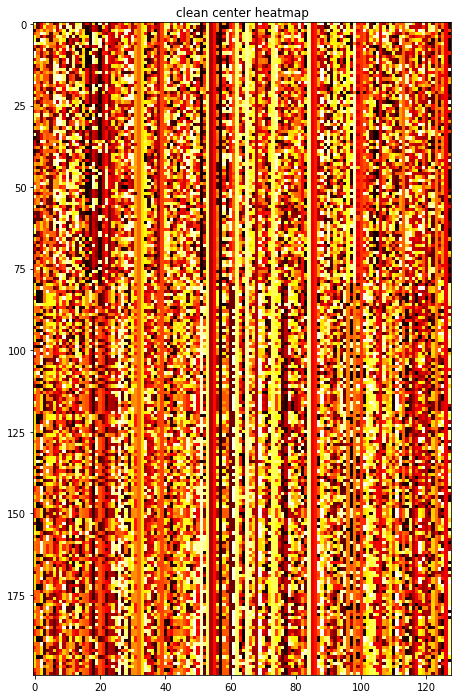

In [243]:
sorted_indices = np.argsort(clean_info['gt'])
sorted_center = clean_info['center'][sorted_indices]
vis_simi(mat=sorted_center[900:1100], plot_name='clean center heatmap')

# Adversarial images

In [283]:
adv_info_path = './pytorch-adversarial_box/adv_info.pkl'
with open(adv_info_path, 'r') as f:
    adv_info = pickle.load(f)
adv_info.keys()

[u'pred', u'adv_imgs', u'gt', u'center']

In [284]:
print adv_info['adv_imgs'].shape
print adv_info['gt'].shape
print adv_info['pred'].shape
print len(adv_info['center'])  # [0, 60] clean test, nb_batch*attack_step*layer(20*100*3), adv test

print adv_info['center'][0].shape

(10000, 1, 28, 28)
(10000,)
(10000,)
6120
(500, 32)


In [285]:
adv_info['center'] = process_center(adv_info, start=6060, end=6120)
adv_info['center'].shape

(10000, 128)

0


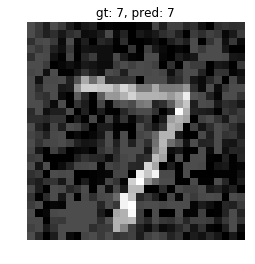

[ 75 178  49 170  80  51 120  94  36  47 130   0 151  29 156  63 196  67
  21 125 113  14   0 108  83 136  53   0   0   5 164 195 176   0 105   0
  33 167 179 186   0   0 159  36   9  79   0  51   0  24 182   9   4   0
   0   0   0 100 122   7 162  35   0   0  91  81  51  68 117 175   0  98
 159  87  57 157 158   1 194 115  85 159 198  71  95  23 177 136 158 142
  73  97  98 109 176 171 190   0  74   0 161  46  25  45  15  65 164 188
   6  42   0 168  46   0  58  40  74  54  48  86  71 140  89   0 152  65
 159 191]
number of center not in valid center:  3
[0, 0, 0]
1


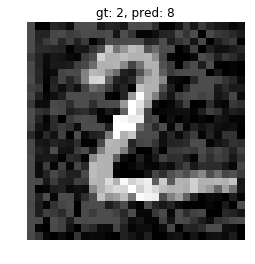

[130 169 127 170 176  76  68  14 123  25 194   0 108 152 196  21   4  62
  25 178  87  14  80   6  78  80  53   0  15 162  24  20 111   0 105   0
  78   0  47 141   0   0 192  64   9 177   0  51   0  24 111  94 173   0
   0   0   0  92 144  53  38  73   0   0 142   0  51 169   0 134 134  81
  10 138   0  12  48   1 142  29  85 104 186 164 150 157  13  54  40 165
  73  97  98  66   0 171   0   0  74   0 161 127 187 122  15 129  34 148
   6  64 170 139   0   0 122  40  79  40  48 184 196  46  61   0  96  65
 159  97]
number of center not in valid center:  2
[0, 0]
2


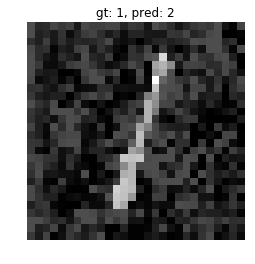

[102 103  61 132 196  78 157  59  52 157  26   0  89  46 196 138  12  62
  25 187  91  14  86  54   8  11   0   0 173  96  76 176 111   0 145   0
  66 129  47 141   0   0 186 165   0  13   0   7   0  60 131  94  48   0
   0 180   0  86 122   7  38 196   0   0   0 141  51  68   0 180 134  61
   0 138 175 115 188   1 126 143  85 104  39 132  82 116  13 106 158 142
  73  97  98 124  86   0   0   0  74   0 161 127  91 102  15 183  34 148
   6 140 135 168  46   0  58 165   7 182  48  61 119  46 125   0 116  65
 171   1]
number of center not in valid center:  3
[0, 0, 0]
3


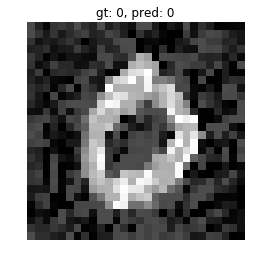

[100 168 162  11  10 101 159 118 120  61  74   0 159  70 153  85   4 121
 129  41  26  10   0  11 110 197  53   0   0 172  24 117 162   0 105   0
  78 184 179  16   0   0  17  89  79 177   0  39   0 172 124   9   4   0
   0   0   0 150 136 117  36  12   0   0 140   0  51 180   0  28  52  81
  89  87 198  24  56   1 104 115  76  85 110   0  82  47  41  54   0  88
 181  97  98  66 190   6 145   0  74  91 161 127  62  10  15  44   6 111
 143 173 121  96 121   0  50  40  79   0 146  61  40 140  96   0 156 139
 171   0]
number of center not in valid center:  3
[0, 0, 0]
4


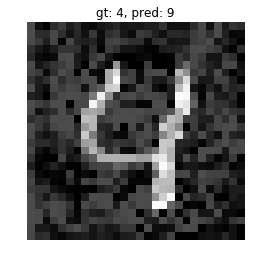

[146   9   2  14  69  43 157  94  40 199  13   0  34 135 174 193 196  67
 107  25  91  37   0 112 178 141  53   0  49  27 143  64 162   0  68   0
  33 150 144 186   0   0  11 153   4 108   0 110   0 171 157   9  94   0
   0   0   0 162 133  73 148  35   0   0   0  81  51 141   0 135 134 121
 159  79 154  89  56   1 167  50  76  33 129  42  69 109 128  53   0 142
 181 180  98 109 103  37  37   0  74   0 161  36  62 117  94  69   0  70
   0 167   0  98  73   0 197 165 173 195  30 184  48   0  18   0 116  66
 171  42]
number of center not in valid center:  3
[0, 0, 0]
5


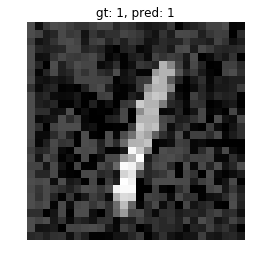

[194  66 195 168 162 141 157  59  69 108 173  12 156 152 156  21 196  67
  25 125 113  14   7  54  79  13  53   0 147  29  20 180 146   0 145   0
  78 172 179 141   0   0 178  52  61 120   0 107   0 140 144 118   0   0
   0   0   0 162 100 115  94  73   0   0  91   0  51   7   0 134  20   0
 181  87  31  94 158   1 194 143 120   0   0  48 124   0 177  95 158  40
 153  97  98  27 153  37 190   0  74   0 161 183  23 122  55  92  13 179
  26  52   0  37  73   0  58  40   2  85  48   0 119  51  34   0  87 127
 159   0]
number of center not in valid center:  1
[0]
6


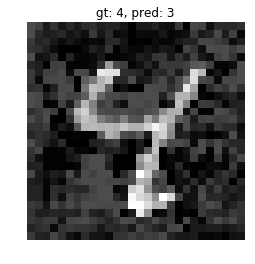

[ 26 168 192  11 100 180   8  59 159  47  74   0 114 103 156  85  54  98
  21  41  87  14   0  11 175 136   0   0 115 131 129  70 146   0 145   0
  78   0  47  69   0   0 159 139  61   0   0  51   0 140 182 118   4   0
   0   0   0 148  34   7  94  12   0   0 180   0  51  68   0 175   0  81
 159 138  57 101 158   1 194 115 120  89   0  29  82 116 177  61 158  28
  73  97  98  66 176   0 190   0  74   0 161 183  23  10  15  70  53  70
  26 126 170  96  46   0  58   0 150  40  48  61 142  46 125   0 152 127
 159  47]
number of center not in valid center:  4
[0, 0, 0, 0]
7


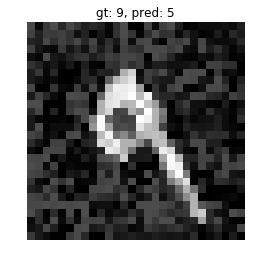

[130  66 162  14 162 195   8 193 159  18  74 175 108 152 196  43   4  40
  96  19  26 135   7  11  78  80  53   0 147 131 129 117 111   0 105   0
 119   0  47 186   0   0 190  88 108  13   0  77   0   3 111 118 173   0
   0   0   0  92 189 130 159  73   0   0 101   0  51 144 180 135 134  81
 181 138   0  26  48   1 104 119  85 141   1  39  18 157  13   1   0 142
  73  97  98  81   0 171  49   0  74   0 161 127 187 122  15  17 189 148
   6  64  78  80 104   0 121  40 150 195   0  86  97   0 114   0  96 181
 159  97]
number of center not in valid center:  1
[0]
8


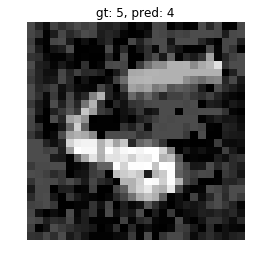

[  0  49 140 118 151 157 120   7 106  39 130   0 105 168  82  54   4 127
 150  70   7 161 149  24   3 156   0   0  86 138  63 106  85   0 105   0
 138 167  47  69   0   0 159  64   0   0   0  24   0 140 155  30   4   0
   0   0   0 162 159   7 162 122   0   0 147  81  51   4  28 180  20  61
 186  87  31 101 148   1 194 163  85 104 129  71 124   0  41  77 158 142
  73  97  98 169 176  19 190   0  74   0 161 127  23 198  15  65  53   0
  26 181 170  48  46   0 109  40  17  85 133  61 119  51  96   0  31 127
 159  47]
number of center not in valid center:  3
[0, 0, 0]
9


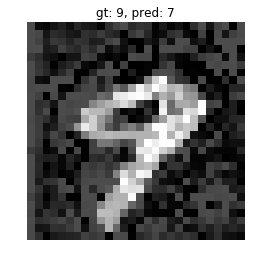

[ 86  96 195 168  25 108  34 181 142 199 101   0  48  29  54  53 196  67
  21  65 131  65  80  11  79  88  53   0  86  86  64 177  17   0  68   0
  89 168 179   0   0   0  96 161 107  46   0 142   0  64   0  81   4   0
   0   0   0  31  46  56 108  72   0   0  20   0  51  48   0   0  20 178
  45  87  31  42 160   1 121 174 175 112   0 102  82   0 128  53  35  30
  63 180  98  50 145  80 110   0  74   0 161 183  23  16  55  23  53  53
  26 105   0  54 122   0 189   0 181 195 194  44   0 140  34   0 175 171
 159   0]
number of center not in valid center:  2
[0, 0]


In [294]:
for i in range(10):
    print i
    show_one_img(idx=i, info=adv_info)

In [135]:
for idx in range(100):
    print (clean_info['center'][idx] == adv_info['center'][idx]).sum()
    print 'gt: {}, clean_pred: {}, adv_pred: {}'.format(adv_info['gt'][idx], 
                                                        clean_info['pred'][idx], 
                                                        adv_info['pred'][idx])

57
gt: 7, clean_pred: 7, adv_pred: 7
20
gt: 2, clean_pred: 2, adv_pred: 3
18
gt: 1, clean_pred: 1, adv_pred: 1
26
gt: 0, clean_pred: 0, adv_pred: 0
28
gt: 4, clean_pred: 4, adv_pred: 9
30
gt: 1, clean_pred: 1, adv_pred: 1
31
gt: 4, clean_pred: 9, adv_pred: 8
39
gt: 9, clean_pred: 5, adv_pred: 7
20
gt: 5, clean_pred: 5, adv_pred: 3
19
gt: 9, clean_pred: 9, adv_pred: 7
22
gt: 0, clean_pred: 0, adv_pred: 2
21
gt: 6, clean_pred: 6, adv_pred: 6
34
gt: 9, clean_pred: 9, adv_pred: 7
19
gt: 0, clean_pred: 0, adv_pred: 0
18
gt: 1, clean_pred: 1, adv_pred: 1
18
gt: 5, clean_pred: 5, adv_pred: 3
22
gt: 9, clean_pred: 9, adv_pred: 4
73
gt: 7, clean_pred: 7, adv_pred: 7
21
gt: 3, clean_pred: 5, adv_pred: 3
19
gt: 4, clean_pred: 4, adv_pred: 9
21
gt: 9, clean_pred: 9, adv_pred: 7
20
gt: 6, clean_pred: 6, adv_pred: 5
17
gt: 6, clean_pred: 6, adv_pred: 9
52
gt: 5, clean_pred: 5, adv_pred: 8
15
gt: 4, clean_pred: 4, adv_pred: 9
17
gt: 0, clean_pred: 0, adv_pred: 0
33
gt: 7, clean_pred: 7, adv_pred: 7
1

In [377]:
class parent:
    def _init_name(self):
        return 'parent'
    name = self._init_name()  
#     def __init__(self,):
#         print(self.name)
    def getName(self):  
        return self.name

    class child:
        def getName(self, aa='kids'):
            parent.name = aa
            return parent.name
  
  
if __name__ == '__main__':
    par = parent()
    print par.getName()
    child =  par.child()
    print par.getName()
    print child.getName()
    print par.getName()
    print child.getName(aa='aaaa')
    print par.getName()

NameError: name 'self' is not defined

In [1]:
import numpy as np

In [2]:
center = np.load('center.npy')
indices_cpu = np.load('indices_cpu.npy')
input_cpu = np.load('input_cpu.npy')
table = np.load('table.npy')
new_center = np.load('new_center.npy')
new_new_center = np.load('new_new_center.npy')
new_table = np.load('new_table.npy')
print center.shape
print indices_cpu.shape
print input_cpu.shape
print table.shape
print new_center.shape
print new_new_center.shape
print new_table.shape

(32, 200, 196)
(128, 32)
(128, 32, 196)
(32, 200, 1)
(32, 200, 196)
(32, 200, 196)
(32, 200, 1)


(32, 200, 1)

In [116]:
indices_one_hot = (np.arange(200) == indices_cpu[...,None]).astype(int)
indices_one_hot = indices_one_hot[..., None]
print indices_one_hot.shape

(128, 32, 200, 1)


In [117]:
cand = input_cpu[:, :, None, :] * indices_one_hot
print cand.shape

(128, 32, 200, 196)


In [ ]:
bb = cand.transpose(1, 2, 0, 3)
sum_bb = bb.sum(0)
is_zero = np.sum(bb.sum(-1) > 0, axis=-1, keepdims=True)
print is_zero[0,10]
# cc = np.where(sum_bb / is_zero[:, :, None])
cc = np.divide(sum_bb, is_zero, out=np.zeros_like(sum_bb), where=is_zero!=0)
print bb.shape
print cc.shape

In [113]:
bb = cand.transpose(1, 2, 0, 3)
sum_bb = bb.sum(-2)
is_zero = np.sum(bb.sum(-1) > 0, axis=-1, keepdims=True)
print is_zero[0,10]
# cc = np.where(sum_bb / is_zero[:, :, None])
cc = np.divide(sum_bb, is_zero, out=np.zeros_like(sum_bb), where=is_zero!=0)
print bb.shape
print cc.shape

[4]
(32, 200, 128, 196)
(32, 200, 196)


In [110]:
np.sum(cc - new_center)

-6.880227737250582e-05

In [115]:
np.sum(table + is_zero - new_table)

0

In [52]:
indices_one_hot = (np.arange(200) == indices_cpu[...,None]).astype(int)
print indices_cpu[0, 0]
print indices_one_hot[0, 0, 29]
# indices_one_hot = indices_one_hot.transpose(1, 0, 2)
indices_one_hot = indices_one_hot[..., None]
print indices_one_hot.shape
indices_one_hot = indices_one_hot.dot(np.ones((1, 196)))
print indices_one_hot.shape
print indices_one_hot[0, 0, 29]

29
1
(128, 32, 200, 1)
(128, 32, 200, 196)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


In [86]:
cand = input_cpu[:, :, None, :] * indices_one_hot
print cand.shape

(128, 32, 200, 196)


In [87]:
print cand[0, 0, 39]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [100]:
a = cand.transpose(1, 2, 0, 3)[0, 10]
print a[a.mean(axis=1) != 0].mean(0)
# a = a.sum(axis=1)
print a.mean(0)

[0.02997731 0.0312435  0.06048484 0.10989447 0.07042796 0.07791007
 0.04515525 0.06879399 0.02189946 0.04720908 0.112031   0.05204263
 0.06771911 0.05824574 0.02179823 0.06485431 0.0795824  0.09326789
 0.07513249 0.08007047 0.05744047 0.05609209 0.03281681 0.06109251
 0.06815216 0.08684524 0.05938133 0.0201621  0.07767019 0.01676704
 0.0637999  0.02772089 0.05695351 0.03259562 0.09213481 0.05819176
 0.03816174 0.07041527 0.04765362 0.03450968 0.02103269 0.03729944
 0.04250006 0.1006942  0.12284308 0.00929442 0.06794606 0.02553378
 0.02528988 0.03044759 0.07023657 0.11429992 0.0858218  0.05428329
 0.03676994 0.0691107  0.03377441 0.06885041 0.06945125 0.10108004
 0.03796677 0.04115097 0.05983631 0.0567952  0.0412446  0.12253246
 0.01507154 0.04247005 0.10798872 0.04068288 0.04052619 0.05939383
 0.03341397 0.09491049 0.04159329 0.02055786 0.03422802 0.04008078
 0.00555901 0.01623359 0.03063394 0.06493456 0.02778664 0.00443149
 0.06319013 0.07440039 0.06969786 0.03207226 0.06951586 0.0337

In [ ]:
bb = cand.transpose(1, 2, 0, 3)[0, 10]

In [105]:
bb = cand.transpose(1, 2, 0, 3)
sum_bb = bb.sum(-2)
is_zero = np.sum(bb.sum(-1) > 0, axis=-1)
print is_zero[0,10]
# cc = np.where(sum_bb / is_zero[:, :, None])
cc = np.divide(sum_bb, is_zero[:, :, None], out=np.zeros_like(sum_bb), where=is_zero[:, :, None]!=0)
print bb.shape
print cc.shape

4
(32, 200, 128, 196)
(32, 200, 196)


In [106]:
np.sum(cc - new_center)

-6.880227737250582e-05

In [19]:
cand = x * indices_one_hot
# cand = cand.transpose(0, 2, 3, 1)
cand = cand.sum(axis=1)
print cand.shape

(32, 200, 196)


In [20]:
res = cand - new_center
np.sum(res)

18375.49873748824

In [97]:
res_center = np.zeros((32, 200, 196))
for i in range(32):
# for i in range(1):
    for j in range(200):
        tmp_feature_vectors = input_cpu[:, i, :][indices_cpu[:, i] == j]
#         print tmp_feature_vectors.shape
        tmp_feature_vectors = input_cpu[:, i, :][indices_cpu[:, i] == j].reshape(-1, 196)
        tmp_feature_len = tmp_feature_vectors.shape[0]
        if tmp_feature_len == 0:
            continue
        if i==0 and j==10:
            print tmp_feature_len
            print tmp_feature_vectors.sum(axis=1)
#             print tmp_feature_vectors
            print tmp_feature_vectors.mean(axis=0)
        res_center[i, j] = tmp_feature_vectors.mean(axis=0)
#     break
print res_center.shape
print np.sum(res_center - new_center)

4
[10.307652 10.674361 10.16596  10.943913]
[0.02997731 0.0312435  0.06048483 0.10989447 0.07042796 0.07791007
 0.04515525 0.06879399 0.02189946 0.04720908 0.112031   0.05204263
 0.0677191  0.05824573 0.02179823 0.06485431 0.0795824  0.09326789
 0.07513249 0.08007047 0.05744047 0.05609208 0.03281681 0.06109251
 0.06815216 0.08684523 0.05938133 0.0201621  0.07767019 0.01676704
 0.0637999  0.02772089 0.05695351 0.03259562 0.09213481 0.05819176
 0.03816174 0.07041527 0.04765362 0.03450968 0.02103269 0.03729944
 0.04250006 0.1006942  0.12284307 0.00929442 0.06794605 0.02553378
 0.02528988 0.03044759 0.07023656 0.11429992 0.0858218  0.05428329
 0.03676993 0.0691107  0.03377441 0.06885041 0.06945124 0.10108004
 0.03796677 0.04115097 0.05983631 0.0567952  0.0412446  0.12253246
 0.01507154 0.04247005 0.10798872 0.04068288 0.04052619 0.05939383
 0.03341398 0.09491049 0.04159328 0.02055786 0.03422802 0.04008078
 0.00555901 0.01623359 0.03063394 0.06493456 0.02778664 0.00443149
 0.06319013 0.0744

In [76]:
print res_center[0, 10]

[0.02997731 0.0312435  0.06048483 0.10989447 0.07042796 0.07791007
 0.04515525 0.06879399 0.02189946 0.04720908 0.112031   0.05204263
 0.0677191  0.05824573 0.02179823 0.06485431 0.0795824  0.09326789
 0.07513249 0.08007047 0.05744047 0.05609208 0.03281681 0.06109251
 0.06815216 0.08684523 0.05938133 0.0201621  0.07767019 0.01676704
 0.0637999  0.02772089 0.05695351 0.03259562 0.09213481 0.05819176
 0.03816174 0.07041527 0.04765362 0.03450968 0.02103269 0.03729944
 0.04250006 0.1006942  0.12284307 0.00929442 0.06794605 0.02553378
 0.02528988 0.03044759 0.07023656 0.11429992 0.0858218  0.05428329
 0.03676993 0.0691107  0.03377441 0.06885041 0.06945124 0.10108004
 0.03796677 0.04115097 0.05983631 0.0567952  0.0412446  0.12253246
 0.01507154 0.04247005 0.10798872 0.04068288 0.04052619 0.05939383
 0.03341398 0.09491049 0.04159328 0.02055786 0.03422802 0.04008078
 0.00555901 0.01623359 0.03063394 0.06493456 0.02778664 0.00443149
 0.06319013 0.0744004  0.06969786 0.03207226 0.06951587 0.0337

In [ ]:
for i in range(nb_channel):
# for i in range(1):
    for j in range(nb_k_center):
    # for j in range(1):
        tmp_feature_vectors = input[:, i, :][indices[:, i] == j].view(-1, feat_dim)
        tmp_feature_len = tmp_feature_vectors.size(0)
        if tmp_feature_len == 0:
            continue
        tmp_count = table_dict[layer_idx][i, j]
        table_dict[layer_idx][i, j] += tmp_feature_len
        if tmp_count == 0:
            tmp = tmp_feature_vectors.mean(dim=0)
            if layer_idx==1:
                new_center[i, j] = tmp.cpu().numpy()
        else:
            # tmp = (center_[i, j]*tmp_count + tmp_feature_vectors.sum(axis=0)) / table_[i, j]
            # moving average
            tmp = tmp_feature_vectors.mean(dim=0)
            if layer_idx==1:
                new_center[i, j] = tmp.cpu().numpy()